In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [2]:
def save_and_show_plot(fig, filename, directory='plots_folder'):
    # Make sure the directory exists, if not, create it
    os.makedirs(directory, exist_ok=True)
    fig.savefig(f"{directory}/{filename}.png", bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure


In [577]:
zones = [
    "MIS_INKY",
    "PJM_WMAC",
    "PJM_SMAC",
    "PJM_West",
    "PJM_AP",
    "PJM_COMD",
    "PJM_ATSI",
    "PJM_Dom",
    "PJM_PENE",
    "S_C_KY",
    "PJM_EMAC",
    "MIS_LMI"
]



# Zone identifier
def zone_ID(file_name='HSC_h2_generation_discharge.csv', scenario=scenario):
    df = open_results_file(file_name=file_name, scenario=scenario)
    df = df.T
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.rename(columns={'Zone': 'Zone_N'})

    df = identify_tech_type(df, resources, aggregate=False)
    df = df.iloc[:-1]
    df = df.reset_index()
    df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))
    zone_dict = pd.Series(df.Zone.values,index=df.Zone_N).to_dict()
    zone_dict = {f'z{int(k)}': v for k, v in zone_dict.items()}
    return(zone_dict)


#Dictionary of zone numbers
zone_ID_dict = zone_ID()
# Zones list
zones = list(zone_ID_dict.values())



generation_resources = [
    "conventional_hydroelectric",
    "conventional_steam_coal",
    "natural_gas_fired_combined_cycle",
    "natural_gas_fired_combustion_turbine",
    "solar_photovoltaic",
    "onshore_wind_turbine",
    "small_hydroelectric",
    "hydroelectric_pumped_storage",
    "nuclear",
    "naturalgas_ccccsavgcf_conservative",
    "naturalgas_ccavgcf_moderate",
    "naturalgas_ctavgcf_moderate",
    "landbasedwind",
    "battery",
    "utilitypv",
    "offshorewind",
    "CCGT-H2",
    "OCGT-H2",
]

# Mapping resources to categories
generation_resource_categories = {
    "conventional_hydroelectric": "Hydro",
    "conventional_steam_coal": "Coal",
    "natural_gas_fired_combined_cycle": "Existing_natural_gas",
    "natural_gas_fired_combustion_turbine": "Existing_natural_gas",
    "naturalgas_ccavgcf_moderate": "New_natural_gas",
    "naturalgas_ctavgcf_moderate": "New_natural_gas",
    "naturalgas_ccccsavgcf_conservative": "Natural_gas_with_CCS",
    "solar_photovoltaic": "Solar",
    "onshore_wind_turbine": "Wind",
    "small_hydroelectric": "Hydro",
    "hydroelectric_pumped_storage": "Hydro",
    "nuclear": "Nuclear",
    "landbasedwind": "Wind",
    "battery": "Battery",
    "utilitypv": "Solar",
    "offshorewind": "Wind",
    "CCGT-H2": "H2",
    "OCGT-H2": "H2",
}

H2_resource_categories = {
    "Electrolyzer": "Electrolyzer",
    "Large_SMR_wCCS_96pct": "Large_SMR_wCCS_96pct",
    "Large_SMR": "Large_SMR",
    "ATR_wCCS_94pct": "ATR_wCCS_94pct",
    "Salt_cavern_storage": "Salt_cavern_storage",
}

scenarios_no_caverns = ["NoCap_PJM_with_MI_no_cavern",
        "PJM_with_MI_no_caverns_70_red", 
        "PJM_with_MI_no_caverns_85_red",
        "PJM_with_MI_no_caverns_90_red", 
        "PJM_with_MI_no_caverns_95_red",
        "PJM_with_MI_no_caverns_99_red",
       "PJM_with_MI_no_caverns_100_red"]

scenarios_with_caverns = ["NoCap_PJM_with_MI_with_cavern",
        "PJM_with_MI_with_caverns_70_red", 
        "PJM_with_MI_with_caverns_85_red",
        "PJM_with_MI_with_caverns_90_red", 
        "PJM_with_MI_with_caverns_95_red",
        "PJM_with_MI_with_caverns_99_red",
        "PJM_with_MI_with_caverns_100_red"]


colors_generation = {
    'H2': 'skyblue', 
    'Battery': 'orange', 
    'Coal': 'black', 
    'Hydro': 'blue',
    'Existing_natural_gas': 'grey',
    'Natural_gas_with_CCS': 'lightgrey',
    'New_natural_gas': 'maroon',
    'Nuclear': 'purple',
    'Solar': '#FFD700',
    'Wind': 'green'
}


H2_colors = {
    "Electrolyzer": "#7B68EE",  # Medium Slate Blue 
    "Large_SMR_wCCS_96pct": "#808000", # Olive
    "Large_SMR": "darkgrey",  # Dark Grey
    "ATR_wCCS_94pct": "#008080",  # Teal
    "Salt_cavern_storage": "#BA55D3",  # Medium Orchid
    "Above_ground_storage": "saddlebrown"
}

costs_colors = {
    'cTotal': 'blue',
    'cFix_Thermal': 'firebrick',
    'cFix_VRE': 'orange',
    'cFix_Trans_VRE': 'gold',
    'cFix_Must_Run': 'yellowgreen',
    'cFix_Hydro': 'lightgreen',
    'cFix_Stor': 'darkgreen',
    'cVar': 'lightblue',
    'cNSE': 'dodgerblue',
    'cStart': 'navy',
    'cUnmetRsv': 'mediumpurple',
    'cNetworkExp': 'plum',
    'cH2Fix_Gen': 'violet',
    'cH2Fix_G2P': 'magenta',
    'cH2Fix_Stor': 'crimson',
    'cH2Fix_Truck': 'palevioletred',
    'cH2Var': 'pink',
    'cH2NSE': 'peachpuff',
    'cH2Start': 'sandybrown',
    'cH2NetworkExp': 'chocolate',
    'cDACFix': 'sienna',
    'cDACVar': 'maroon',
    'cCO2Comp': 'coral',
    'cCO2Start': 'tomato',
    'cCO2Stor': 'salmon',
    'cCO2NetworkExp': 'darkorange',
    'cBiorefineryFix': 'khaki',
    'cBiorefineryVar': 'yellow',
    'cHerb': 'springgreen',
    'cWood': 'mediumseagreen',
    'cSFFix': 'teal',
    'cSFVar': 'turquoise',
    'cSFByProdRev': 'cyan',
    'CSFConvDieselFuelCost': 'deepskyblue',
    'CSFConvJetfuelFuelCost': 'blue',
    'CSFConvGasolineFuelCost': 'slateblue',
    'cPower_Total': 'blueviolet',
    'cHSC_Total': 'purple',
    'cCSC_Total': 'indigo',
    'cBiorefinery': 'pink',
    'cBioresources': 'lightcoral',
    'cSF_Prod': 'lightsalmon',
    'cConv_Fuels': 'darkred',
    'cHydro_Must_Run': 'darkgrey',
}

emissions_colors = {
    "Power System": "#FF8C00",  # Medium Slate Blue 
    "H2 System": 'skyblue', # Olive
}

rename_dict= {
    'PJM_with_MI_no_caverns_0_red': 'No Emission Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_70_red': '70% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_85_red': '85% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_90_red': '90% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_95_red': '95% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_99_red': '99% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_100_red': '100% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_with_caverns_0_red': 'No Emission Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_70_red': '70% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_85_red': '85% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_90_red': '90% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_95_red': '95% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_99_red': '99% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_100_red': '100% Emission Reduction Cap\n with Salt Caverns'
}


scenarios_no_caverns = ['PJM_with_MI_no_caverns_0_red',
    'PJM_with_MI_no_caverns_70_red',
    'PJM_with_MI_no_caverns_85_red',
    'PJM_with_MI_no_caverns_90_red',
    'PJM_with_MI_no_caverns_95_red',
    'PJM_with_MI_no_caverns_99_red',
    'PJM_with_MI_no_caverns_100_red']
 
scenarios_with_caverns =  ['PJM_with_MI_with_caverns_0_red',
    'PJM_with_MI_with_caverns_70_red',
    'PJM_with_MI_with_caverns_85_red',
    'PJM_with_MI_with_caverns_90_red',
    'PJM_with_MI_with_caverns_95_red',
    'PJM_with_MI_with_caverns_99_red',
    'PJM_with_MI_with_caverns_100_red']


# Zone identifier
def zone_ID(file_name='HSC_h2_generation_discharge.csv', scenario=scenario):
    df = open_results_file(file_name=file_name, scenario=scenario)
    df = df.T
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.rename(columns={'Zone': 'Zone_N'})

    df = identify_tech_type(df, resources, aggregate=False)
    df = df.iloc[:-1]
    df = df.reset_index()
    df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))
    zone_dict = pd.Series(df.Zone.values,index=df.Zone_N).to_dict()
    zone_dict = {f'z{int(k)}': v for k, v in zone_dict.items()}
    return(zone_dict)


scenarios = scenarios_no_caverns

In [545]:
def identify_tech_type(df, resources, aggregate=True, dont_aggregate=''):
    tech_types = []
    for name in df['Resource']:
        for zone in zones:
            if name.startswith(zone):
                cleaned_string = name[len(zone) + 1:]
                break
            else:
                cleaned_string = name
        
        for r in resources:
            if cleaned_string.startswith(r):
                result_string = resources[r]
                break
            else:
                result_string = cleaned_string
        tech_types.append(result_string)

    df['Tech_Type'] = tech_types
    
    if aggregate == True:
        # Aggregate other columns based on the identified technology types
        aggregated_df = df.groupby('Tech_Type').sum().reset_index()
        
        if dont_aggregate != '':
            aggregated_df = df.groupby(dont_aggregate).sum().reset_index()
            

        return aggregated_df
    if aggregate == False:
        return df



In [5]:
import os

def find_latest_result_folder(path):
    result_folders = [folder for folder in os.listdir(path) if folder.startswith("Results")]
    if not result_folders:
        raise ValueError("No 'Results' folders found.")
        
    result_numbers = [int(folder.split("_")[-1]) if "_" in folder else 0 for folder in result_folders]
    latest_result = max(result_numbers)
    
    if latest_result == 0:
        return "Results"
    else:
        return f"Results_{latest_result}"

def latest_result_finder(path):
    latest_result_path = find_latest_result_folder(path)
    path = path + '/' + latest_result_path + '/'
    #path_capacity = path + '/' + latest_result_path + '/capacity_w_H2G2P.csv'
    #path_power = path + '/' + latest_result_path + '/power_w_H2G2P.csv'
    #print(path_capacity)
    #print(path_power)
    #return(path_capacity, path_power)
    return(path)
    
def open_results_file(file_name, scenario):
    scenario = '/Users/lesarmstrong/Documents/GitHub/DOLPHYN_May2023_SuperCloud/Example_Systems/PJM_with_MI/' + scenario
    path = latest_result_finder(scenario)
    if file_name.startswith('HSC'):
        path = path + 'Results_HSC/'
    path = path + file_name
    #print(path)
    df = pd.read_csv(path)
    return(df)


df_capacity_nocavern_nocap = open_results_file(file_name='capacity_w_H2G2P.csv', scenario='PJM_with_MI_no_caverns_0_red') 

In [254]:
def capacity_w_H2G2p_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('capacity_w_H2G2P.csv', scenario)
    aggregated_df = identify_tech_type(df, generation_resource_categories)
    return(aggregated_df)

def power_w_H2G2p_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('power_w_H2G2P.csv', scenario)
    df = df.T 

    # Step 1: Convert the index into a column
    df_with_index_as_column = df.reset_index()

    # Step 2: Rename the new column
    df_with_index_as_column = df_with_index_as_column.rename(columns={'index': 'your_new_column_name'})

    # Step 3: Convert the first row into column indices
    df_with_index_as_column.columns = df_with_index_as_column.iloc[0]

    # Step 4: Drop the first row
    df_with_index_as_column = df_with_index_as_column.drop(df_with_index_as_column.index[0])

    # Step 5: Reset the index
    df_with_index_as_column = df_with_index_as_column.reset_index(drop=True)
    df = df_with_index_as_column[['Resource', 'AnnualSum']]
    df = df.iloc[:-1]
    df = identify_tech_type(df, generation_resource_categories)
    return(df)

def generation_difference_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('capacity_w_H2G2P.csv', scenario)
    df = identify_tech_type(df, generation_resource_categories)
    df = df[['Tech_Type', 'StartCap', 'EndCap']]
    #df = df[df['Tech_Type'] != 'Total']
    df['Cap_difference'] = df['EndCap'] - df['StartCap'] 
    return(df)


def h2_capacity_analysis(scenario,H2_resource_categories=H2_resource_categories):
    #scenario = 'PJM_with_MI_no_caverns_70_red'
    df = open_results_file('HSC_generation_storage_capacity.csv', scenario)
    #aggregated_df = identify_tech_type(df, generation_resource_categories)
    aggregated_df = identify_tech_type(df, H2_resource_categories)
    return(aggregated_df)

def h2_generation_analysis(scenario,H2_resource_categories=H2_resource_categories, aggregate_zones=True):
    #scenario = 'PJM_with_MI_no_caverns_70_red'
    df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
    df = df.T.reset_index()
    # assuming df is your DataFrame
    df.columns = df.iloc[0]
    df = df[1:]
    
    if aggregate_zones == True:
        aggregated_df = identify_tech_type(df, H2_resource_categories)
        return(aggregated_df)
    
    if aggregate_zones == False:
        df = df.rename(columns={'Zone': 'Zone_N'})
        df = identify_tech_type(df, resources, aggregate=False)
        df = df.iloc[:-1]
        df = df.reset_index()
        df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))
 
        return(df)
        

## GET COSTS ##
def get_total(df, cost_name):
    total = df.loc[df['Costs'] == cost_name, 'Total'].values[0]
    return total

def cost_analysis(scenario, cost_name='cTotal'):
    df = open_results_file('costs_system.csv', scenario)
    cost = get_total(df, cost_name)
    return(cost)
   
    
def max_row_sum_for_yaxis(df):
    index_of_max_sum_row = df.clip(lower=0).sum(axis=1).idxmax()
    max_sum_row = df.loc[index_of_max_sum_row].clip(lower=0).sum()
    #print(df.loc[index_of_max_sum_row].sum())
    #print(max_sum_row)
    return(max_sum_row)

def min_row_sum_for_yaxis(df):
    #print(df)
    index_of_min_sum_row = df.sum(axis=1).idxmin()
    #print(index_of_min_sum_row)
    min_sum_row = df.loc[index_of_min_sum_row].sum()
    #print(df.loc[index_of_min_sum_row].sum())
    #print(min_sum_row)
    
    min_sum_row = df.min().min()
    #print(min_sum_row)
    return(min_sum_row)

{'z1': 'MIS_INKY',
 'z2': 'PJM_WMAC',
 'z3': 'PJM_SMAC',
 'z4': 'PJM_West',
 'z5': 'PJM_AP',
 'z6': 'PJM_COMD',
 'z7': 'PJM_ATSI',
 'z8': 'PJM_Dom',
 'z9': 'PJM_PENE',
 'z10': 'S_C_KY',
 'z11': 'PJM_EMAC',
 'z12': 'MIS_LMI'}

In [490]:
#def h2_spatial(scenarios=scenarios):
        


def spatial_scenario_dict_creator(result_file, scenarios=scenarios):
    dataframes_dict = {}
    for scenario in scenarios:
        #print(scenario)

        df = open_results_file(result_file, scenario)
        df = df.T
        #identify_tech_type(df, resources, aggregate=False)
        df = df.reset_index()
        df.columns = df.iloc[0]
        df = df[1:]
        df = df.rename(columns={'Zone': 'Zone_N'})

        df = identify_tech_type(df, resources, aggregate=False)
        df = df.iloc[:-1]
        df = df.reset_index()
        df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))

        # Group the dataframe by 'Zone_N'
        zoned = df.groupby('Zone')

        # Create a double key dictionary of dataframes. Keys are scenario and zone

        for zone, group in zoned:
            dataframes_dict[zone, scenario] = group
    return(dataframes_dict)

dataframes_dict = spatial_scenario_dict_creator(result_file='HSC_h2_generation_discharge.csv', scenarios=scenarios)

In [759]:
dataframes_dict = {}

def h2_spatial(scenarios=scenarios):

df = open_results_file(file_name='HSC_h2_generation_discharge.csv', scenario=scenario)
df = df.T
#identify_tech_type(df, resources, aggregate=False)
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns={'Zone': 'Zone_N'})

df = identify_tech_type(df, resources, aggregate=False)
df = df.iloc[:-1]
df = df.reset_index()
df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))
zoned = df.groupby('Zone')
for zone, group in zoned:
        dataframes_dict[zone, scenario] = group


In [758]:
# Trying to write load data into plot with dotted line. Will have to add new function to stacked barchart function
# Returns yearly load data for each zone [metric tons]
def zone_h2_load_data(load_file = '../HSC_load_data.csv', scenario=scenario):

    df = open_results_file(file_name=load_file, scenario=scenario)

    zone_dict = zone_ID()

    # Create a list of all columns in df that contain 'zn' in their names
    zn_columns = [col for col in df.columns if 'z' in col]

    # Create a new dictionary with the zone names from zone_dict as keys and the corresponding column values from df as values
    # Multiplied by 8760 to go from tons/hr ---> tons/year
    new_dict = {zone_dict[key.replace("Load_H2_tonne_per_hr_", "")]: int(df[key].values[0]*8760) for key in zn_columns}

    # Print the new dictionary
    return(new_dict)


def power_load_data(load_file = 'power_w_H2G2P.csv', scenario=scenario):
    df = open_results_file(file_name=load_file, scenario=scenario)
    df = df.T
    df.columns = df.iloc[0] 
    df = df.iloc[1:]

    df = df.reset_index()
    df = df.rename(columns={'index': 'Resource'})
    df = identify_tech_type(df, generation_resource_categories, aggregate=True, dont_aggregate=['Zone'])
    df = df.iloc[1:]
    #df = df[['Zone', 'Resource', 'AnnualSum']]
    return(df)

power_load_data(load_file = 'power_w_H2G2P.csv', scenario=scenario)

## Old function code ##
'''
def HSC_h2_balance_dict(file_name='Results_HSC/HSC_h2_balance.csv', scenario=scenario):

    df = open_results_file(file_name=file_name, scenario=scenario)
    df = df.T
    df.columns = df.iloc[0]

    df = df.iloc[1:]
    df = df.rename(columns={'Zone': 'Zone_N'})
    # Convert the 'Zone_N' column to string and prepend 'z'
    df['Zone_N'] = 'z' + df['Zone_N'].astype(int).astype(str)

    # Now map 'Zone_N_str' to the dictionary values
    df['Zone'] = df['Zone_N'].map(zone_ID_dict)

    # Ignoring the time dependance here
    df = df[['Zone', 'AnnualSum']]
    #df = df.loc[['Generation', 'H2_Pipeline_Import/Export']]
    #df.columns = df.iloc[0]  # Make the first row as column names
    #df = df.iloc[1:]  # Remove the first row as it's now the column names
    df = df.T
    df = df.rename_axis(None)

    # Transpose the DataFrame so that 'Zone' and 'AnnualSum' are columns
    df= df.T
    keywords = ['Generation', 'H2_Pipeline_Import/Export', 'H2G2P', 'Demand']
    df = df[df.index.to_series().str.contains('|'.join(keywords))]
    drop_indexes = ['Flexible_Demand_Defer', 'Flexible_Demand_Satisfy']
    df = df.drop(drop_indexes, errors='ignore')

    # Initialize an empty dictionary to hold the data
    zone_dict = {}
    # Loop over the rows in the DataFrame
    for index, row in df.iterrows():
        index = index.split('.')[0]
        # Get the 'Zone' for this row
        zone = row['Zone']
        # Get the 'AnnualSum' for this row
        annual_sum = row['AnnualSum']

        # If this 'Zone' is not already a key in the dictionary, add it with an empty dictionary as its value
        if zone not in zone_dict:
            zone_dict[zone] = {}

        # If this parameter (the index) is not already a key in the inner dictionary, add it with an empty list as its value
        if index not in zone_dict[zone]:
            zone_dict[zone][index] = []

        # Append the 'AnnualSum' to the list for this parameter in this 'Zone'
        zone_dict[zone][index].append(annual_sum)
        
        
    df = pd.DataFrame(zone_dict).T

    # Now, if you want to remove the list encapsulation and only have single values for each cell (since it seems like you only have single-item lists), you can do the following:

    df = df.applymap(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
    
    drop_columns = ['Flexible_Demand_Defer', 'Flexible_Demand_Satisfy']
    df = df.drop(drop_columns, axis=1)

    return(df)
'''
def HSC_h2_balance_dict(file_name='Results_HSC/HSC_h2_balance.csv', scenario=scenario):
    df = open_results_file(file_name=file_name, scenario=scenario)
    df = df.T
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df = df.rename(columns={'Zone': 'Zone_N'})

    df['Zone_N'] = 'z' + df['Zone_N'].astype(int).astype(str)
    df['Zone'] = df['Zone_N'].map(zone_ID_dict)

    df = df[['Zone', 'AnnualSum']]
    df.index = df.index.str.split('.').str[0]

    keywords = ['Generation', 'H2_Pipeline_Import/Export', 'H2G2P', 'Demand']
    df = df[df.index.isin(keywords)]

    # Create a pivot table where each zone's data forms a sub-DataFrame
    df_pivot = df.pivot(columns='Zone', values='AnnualSum')

    # Simplify the DataFrame removing unnecessary multi-indexing
    df_pivot.columns.name = None
    df_pivot.index.name = None
    df = df_pivot.T
    return df


#generation_dict = {}
#for zone in zones:
#    generation_dict[zone] = zone_dict[zone]['Generation'] 

#generation_dict
df_HSC_h2_balance = HSC_h2_balance_dict()

#df_HSC_h2_balance.loc[zones[0]]
df_HSC_h2_balance

,Demand,Generation,H2G2P,H2_Pipeline_Import/Export
MIS_INKY,-507204.0,564338.23961,-6112.955666,-51021.283941
MIS_LMI,-168454.8,742142.981544,-580278.834368,6590.652711
PJM_AP,-130129.8,126851.20082,-17.364906,3295.964088
PJM_ATSI,-227322.0,205279.429847,-11.759066,22054.329221
PJM_COMD,-138473.7,138000.721258,-1891.092012,2364.070757
PJM_Dom,-45880.5,44180.838024,-15.406143,1715.068121
PJM_EMAC,-50545.2,50673.792652,-97.927422,-30.665228
PJM_PENE,-38368.8,40694.367929,-819.560999,-1506.006927
PJM_SMAC,-46778.4,51362.171144,-2135.807153,-2447.963989
PJM_WMAC,-38368.8,37450.641218,-4536.99809,5455.156874


In [747]:
def spatial_scenario_dict_creator_v2(result_file, scenarios=scenarios):
    dataframes_dict = {}
    for scenario in scenarios:
        #print(scenario)
        df_HSC_h2_balance = HSC_h2_balance_dict()
        # Group the dataframe by 'Zone_N'

        # Create a double key dictionary of dataframes. Keys are scenario and zone

        for zone in zones:
            dataframes_dict[zone, scenario] = df_HSC_h2_balance.loc[zone]
    return(dataframes_dict)

dataframes_dict = spatial_scenario_dict_creator(result_file='Results_HSC/HSC_h2_balance.csv', scenarios=scenarios)
#dataframes_dict

In [734]:
def multiple_zone_barchart_plot(dataframes_dict, scenarios=scenarios, zones=zones):

    # Finds max value which allows me to set scale for all the barplots relative to each other

    max_value = 0

    for keys, df in dataframes_dict.items():
        filtered_df = df[~df['Tech_Type'].str.contains('storage')]
        max_in_df = filtered_df['AnnualSum'].max()

        if max_in_df > max_value:
            max_value = max_in_df
    
    # Find load data for each zone
    h2_load_zoned = zone_h2_load_data()
    
    for zone in zones:

        df_main = pd.DataFrame()

        for scenario in scenarios:
            dff = dataframes_dict[(zone,scenario)]

            dff = dff[['Tech_Type', 'AnnualSum']]
            #dff = dff.set_index('Tech_Type')


            dff = dff.rename(columns={'AnnualSum': scenario})#

            dff = dff[dff['Tech_Type'] != 'Above_ground_storage']
            dff = dff[dff['Tech_Type'] != 'Salt_cavern_storage']

            # Transpose the dataframe    
            dff = dff.set_index('Tech_Type').T
            #dff = dff.columns = dff.columns.droplevel(0)
            #dff = dff.set_index('Tech_Type', inplace=True)
            #

            #dff.reset_index()
            df_main = df_main.append(dff, ignore_index=False)

        plot_stacked_barchart(df_main=df_main, title=zone, legend_title="", y_label="", units=2,
                              retirement=False, sort_values=False, legend_custom=False, comparing=False,
                               spatial_shared_y_limit=max_value, load_data=h2_load_zoned[zone])


    #df_main


In [748]:
dataframes_dict
max_value = 0

for 
if max_in_df > max_value:
            max_value = max_in_df

{('MIS_INKY',
  'PJM_with_MI_no_caverns_0_red'): Demand                          -507204.0
 Generation                   564338.23961
 H2G2P                        -6112.955666
 H2_Pipeline_Import/Export   -51021.283941
 Name: MIS_INKY, dtype: object,
 ('PJM_WMAC',
  'PJM_with_MI_no_caverns_0_red'): Demand                           -38368.8
 Generation                   37450.641218
 H2G2P                         -4536.99809
 H2_Pipeline_Import/Export     5455.156874
 Name: PJM_WMAC, dtype: object,
 ('PJM_SMAC',
  'PJM_with_MI_no_caverns_0_red'): Demand                           -46778.4
 Generation                   51362.171144
 H2G2P                        -2135.807153
 H2_Pipeline_Import/Export    -2447.963989
 Name: PJM_SMAC, dtype: object,
 ('PJM_West',
  'PJM_with_MI_no_caverns_0_red'): Demand                           -227322.0
 Generation                   229290.037305
 H2G2P                          -108.467253
 H2_Pipeline_Import/Export     -1859.570049
 Name: PJM_West, dty

In [ ]:
def multiple_zone_barchart_plot_v2(dataframes_dict, scenarios=scenarios, zones=zones):

    # Finds max value which allows me to set scale for all the barplots relative to each other

    max_value = 0

    for keys, df in dataframes_dict.items():
        filtered_df = df[~df['Tech_Type'].str.contains('storage')]
        max_in_df = filtered_df['AnnualSum'].max()

        if max_in_df > max_value:
            max_value = max_in_df
    
    # Find load data for each zone
    h2_load_zoned = zone_h2_load_data()
    
    for zone in zones:

        df_main = pd.DataFrame()

        for scenario in scenarios:
            dff = dataframes_dict[(zone,scenario)]

            dff = dff[['Tech_Type', 'AnnualSum']]
            #dff = dff.set_index('Tech_Type')


            dff = dff.rename(columns={'AnnualSum': scenario})#

            dff = dff[dff['Tech_Type'] != 'Above_ground_storage']
            dff = dff[dff['Tech_Type'] != 'Salt_cavern_storage']

            # Transpose the dataframe    
            dff = dff.set_index('Tech_Type').T
            #dff = dff.columns = dff.columns.droplevel(0)
            #dff = dff.set_index('Tech_Type', inplace=True)
            #

            #dff.reset_index()
            df_main = df_main.append(dff, ignore_index=False)

        plot_stacked_barchart(df_main=df_main, title=zone, legend_title="", y_label="", units=2,
                              retirement=False, sort_values=False, legend_custom=False, comparing=False,
                               spatial_shared_y_limit=max_value, load_data=h2_load_zoned[zone])


    #df_main


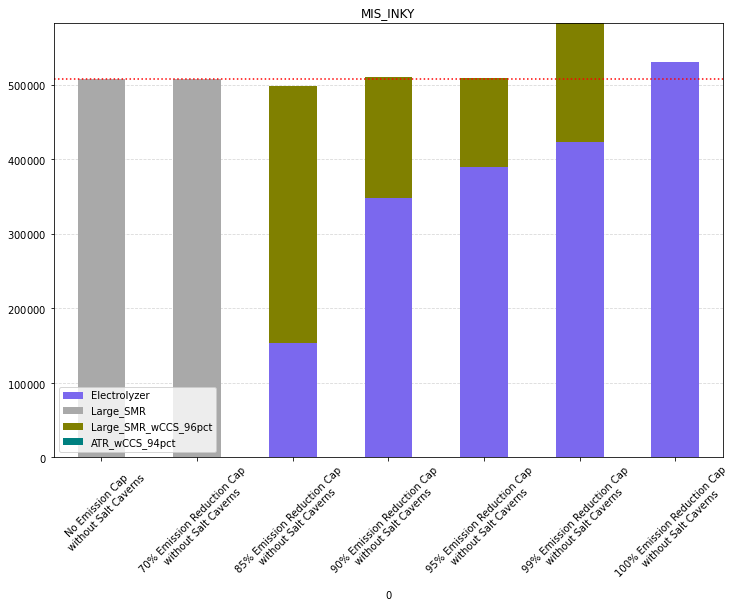

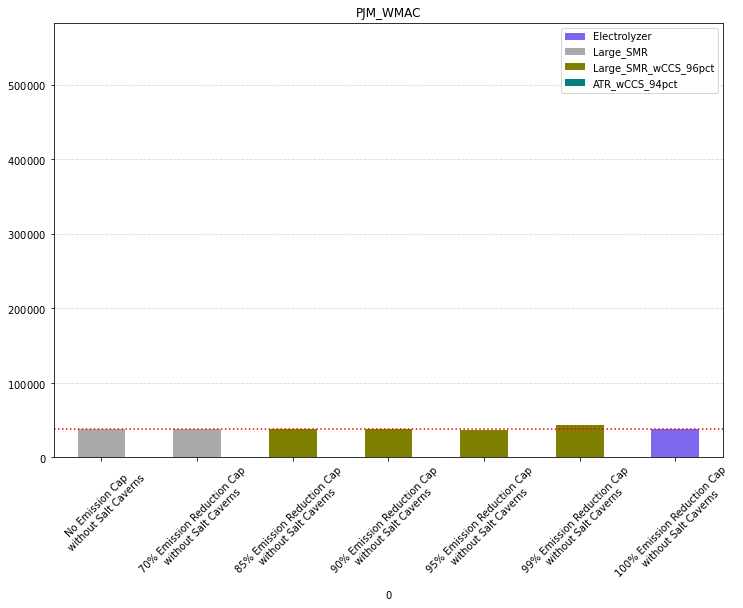

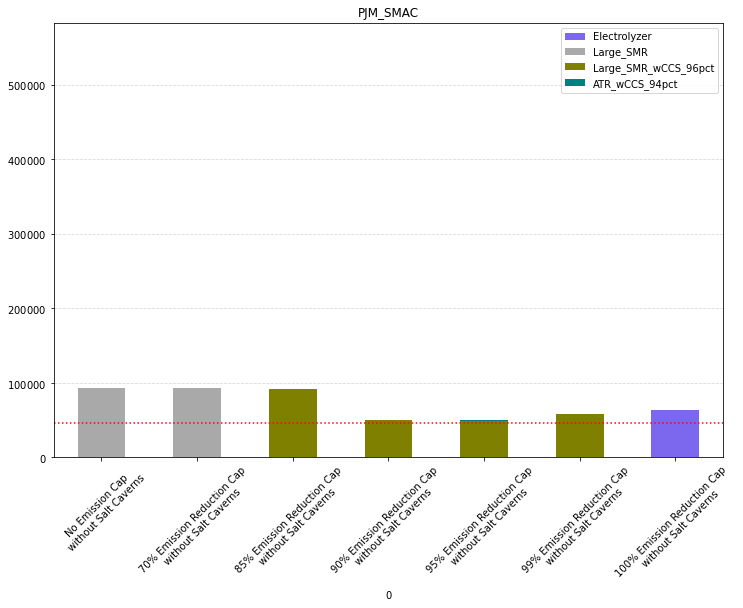

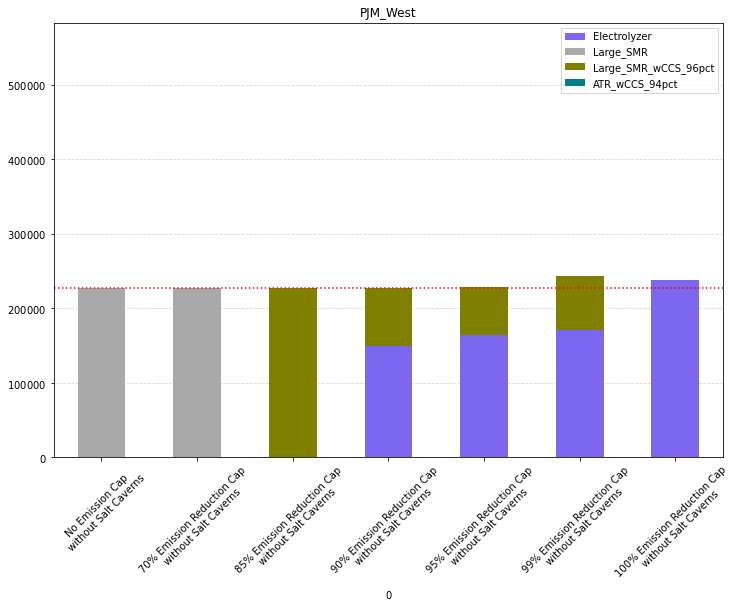

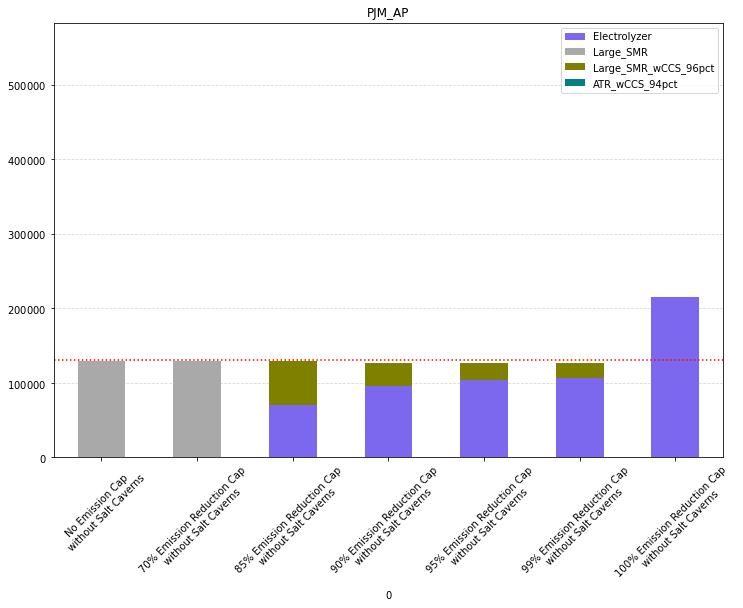

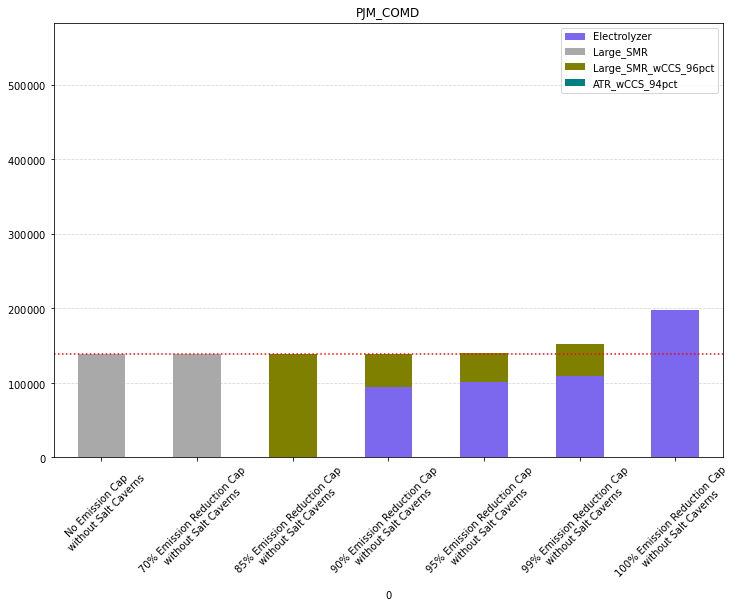

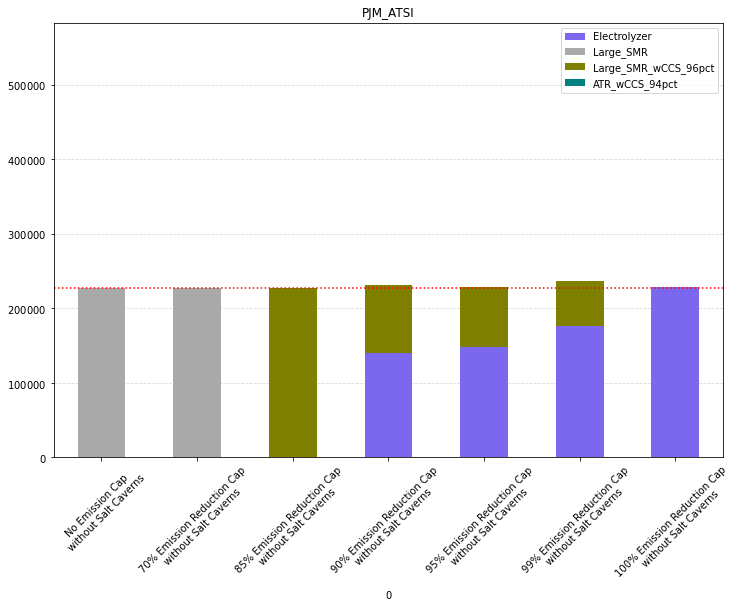

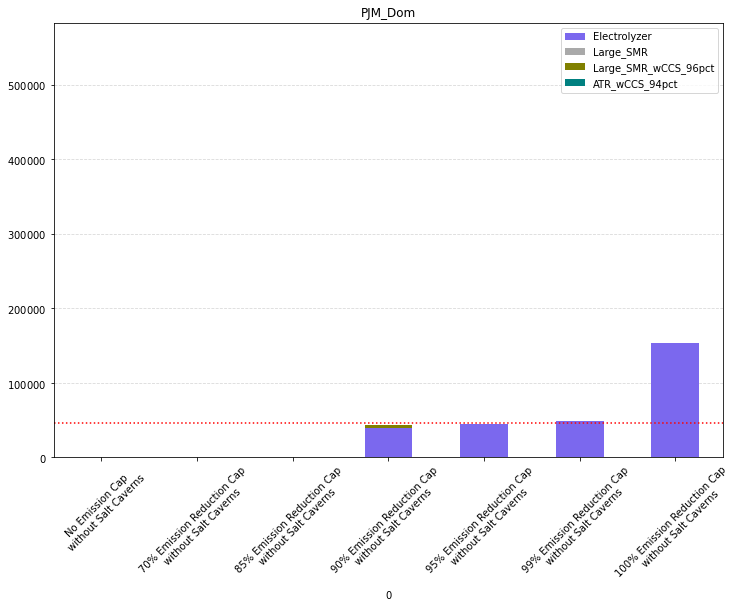

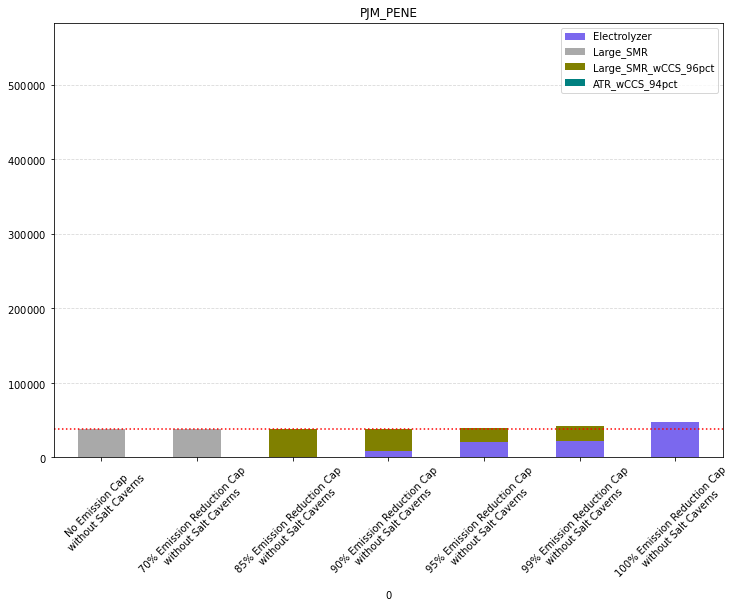

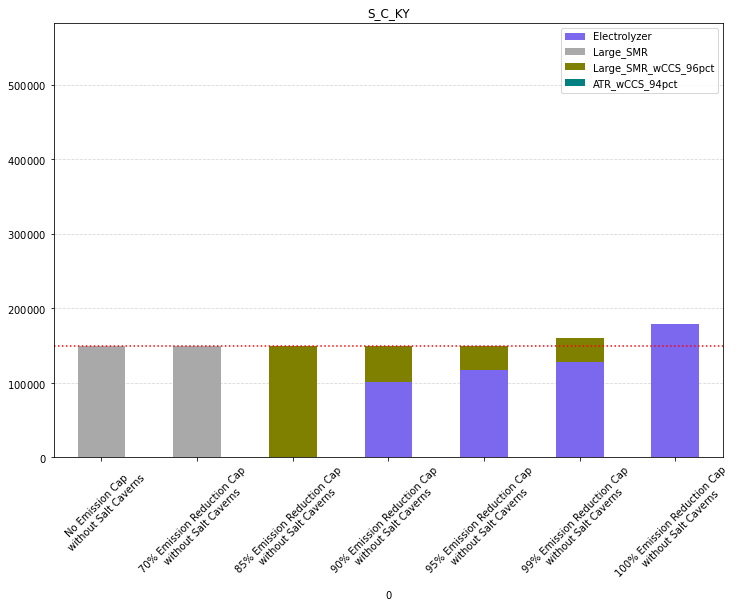

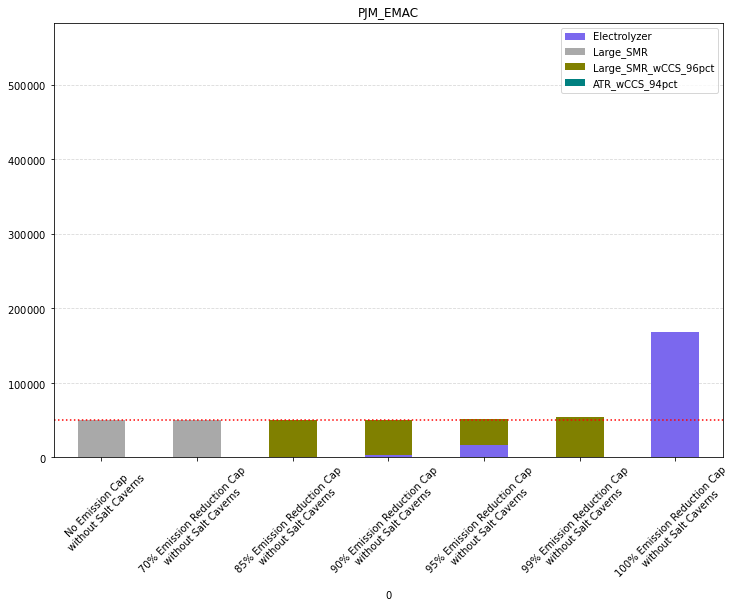

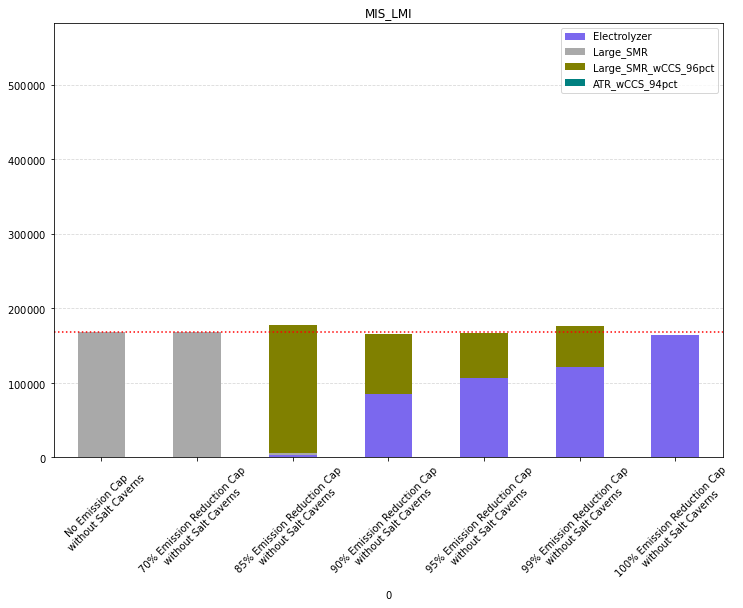

In [737]:
multiple_zone_barchart_plot(dataframes_dict = dataframes_dict, scenarios = scenarios)

In [391]:
def h2_generation(scenarios, title=title, y_label=y_label, units=2):
    df_main = pd.DataFrame()
    
    for scenario in scenarios:
        df = h2_generation_analysis(scenario,H2_resource_categories=H2_resource_categories)


        df = df[['Tech_Type', 'AnnualSum']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'AnnualSum': scenario})#

        df = df[df['Tech_Type'] != 'Above_ground_storage']
        df = df[df['Tech_Type'] != 'Salt_cavern_storage']

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)

# Plotting Barcharts Function

In [736]:
title=''
legend_title=''
y_label = '' 

def plot_stacked_barchart(df_main, title=title, legend_title=legend_title, y_label=y_label, units=1,
                          retirement=False, sort_values=False, legend_custom=False, comparing=False,
                          spatial_shared_y_limit=0, load_data=0):
    
    #print(df_main)
    #print("UNITS ARE: " + str(units))
    H2_colors = {
        "Electrolyzer": "#7B68EE",  # Medium Slate Blue 
        "Large_SMR_wCCS_96pct": "#808000", # Olive
        "Large_SMR": "darkgrey",  # Dark Grey
        "ATR_wCCS_94pct": "#008080",  # Teal
        "Salt_cavern_storage": "#BA55D3",  # Medium Orchid
        "Above_ground_storage": "saddlebrown"
    }

    # units = 1 is for generation
    if units == 1:
        # MW --> GW
        df_main = df_main.div(1000)
        colors = colors_generation
   
    # units = 2 is for H2
    if units == 2:
        colors = H2_colors
    
    # units = 3 is for Costs
    if units == 3:
        colors = costs_colors
    
    # All others? (For now is for emissions)
    if units == 4:
        colors = emissions_colors


    if sort_values == True:
        # Calculate the sum of each row (i.e., the total height of each bar)
        row_sums = df_main.sum(axis=1)

        # Sort the DataFrame by the row sums
        df_main = df_main.loc[row_sums.sort_values().index]

        
    # Create a new figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))


    # With retirement
    #if retirement == True:
    if df_main.select_dtypes(include=[np.number]).min().min() < -1:
        # Split the dataframe into two: one for positive values and another for negative values
        df_pos = df_main.clip(lower=0)  # This replaces negative values with 0
        df_neg = df_main.clip(upper=0)  # This replaces positive values with 0

        # Create the bar chart for positive values
        ax = df_pos.plot(kind='bar', stacked=True, color=[colors[i] for i in df_pos.columns], ax=ax)

        # Stack the negative values below by creating a bar chart with negative dataframe
        ax = df_neg.plot(kind='bar', stacked=True, color=[colors[i] for i in df_neg.columns], ax=ax)

    else:
        #print(colors)
        ax = df_main.plot(kind='bar', stacked=True, color=[colors[i] for i in df_main.columns], ax=ax)
        
        
    df_main.rename(index=rename_dict, inplace=True)
   # Create a custom legend
    handles, labels = ax.get_legend_handles_labels()
    # Create a dictionary to eliminate duplicate entries
    legend_dict = dict(zip(labels, handles))
    ax.legend(legend_dict.values(), legend_dict.keys(), title=legend_title)

    # Set the y-axis label
    ax.set_ylabel(y_label)
    # Add grid lines
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', which='major', color='gray', alpha=.3, axis='y')

    # Adjust y-axis limits
    max_value = max_row_sum_for_yaxis(df_main)
    
    ## If plotting multiple barcharts that all share scale (so for for example a spatial analysis) ##
    if spatial_shared_y_limit != 0:
        max_value = spatial_shared_y_limit
    
    max_limit = max_value * 1.1
    
    min_value = min_row_sum_for_yaxis(df_main)
    min_limit = min_value * 2 if min_value < 0 else 0

    ax.set_ylim([min_limit, max_limit])

    ax.axhline(0, color='black', linewidth=1)
    
    # Adding dotted lines for load:
    if load_data != 0:
        ax.axhline(load_data, color='red', linestyle='dotted')

    
    
    
    ax.set_title(title)
    ax.set_xticks(range(len(df_main.index)))
    ax.set_xticklabels(df_main.index, rotation=45)
    if comparing == True:
        x_ticks_labels = df_main.index = df_main.index.str.split('Cap').str[0]
        ax.set_xticklabels(x_ticks_labels, rotation=45)
    
    
    # Set y-axis formatter to ScalarFormatter and disable scientific notation
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    ax.yaxis.set_major_formatter(formatter)


    plt.show()

    #save_and_show_plot(fig, title)
    

In [326]:
#title = 'Installed Capacity (MW) Across Different Decarbonization Scenarios without Salt Cavern H2 Storage'
def generation_capacity_barchart(scenarios=scenarios, title=title, y_label=y_label):
    df_main = pd.DataFrame()

    for scenario in scenarios:

        df = capacity_w_H2G2p_analysis(scenario)
        df = df[['Tech_Type', 'EndCap']]
        # Remove the 'Total' row
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'EndCap': scenario})

        # Transpose the dataframe
        df = df.set_index('Tech_Type').T

        df_main = df_main.append(df, ignore_index=False)
    
    df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    
    plot_stacked_barchart(df_main, title=title, y_label=y_label)
    return(df_main)

def generation_capacity_retirement_barchart(scenarios=scenarios, title=title, y_label=y_label):
    
    df_main = pd.DataFrame()
    for scenario in scenarios:

        df = generation_difference_analysis(scenario)
        df = df.drop(['StartCap', 'EndCap'], axis=1)
        df = df[df['Tech_Type'] != 'Total']
        
        df = df.rename(columns={'Cap_difference': scenario})
        # Transpose the dataframe
        df = df.set_index('Tech_Type').T

        df_main = df_main.append(df, ignore_index=False)
        df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    plot_stacked_barchart(df_main, title=title, y_label=y_label, retirement=True)
    #print(df_main)
    return(df_main)

def generation_power_barchart(scenarios=scenarios, title=title, y_label=y_label):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = power_w_H2G2p_analysis(scenario)
        df = df[['Tech_Type', 'AnnualSum']]
        # Remove the 'Total' row
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'AnnualSum': scenario})

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    
    # Sort ascending values
    df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    df_main = df_main.drop('Battery', axis=1)
    plot_stacked_barchart(df_main, title=title, y_label=y_label)
    return(df_main)
 
def h2_storage_capacity_barchart(scenarios, title=title, y_label=y_label, units=2):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = h2_capacity_analysis(scenario)
        
        df = df[['Tech_Type', 'EndEnergyCap']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'EndEnergyCap': scenario})
        # removes rows with 0 (non-storage tech)
        df = df.loc[df[scenario] != 0]

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    
    
    # Sort ascending values
    df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)
    
def h2_capacity_generation(scenarios, title=title, y_label=y_label, units=2):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = h2_capacity_analysis(scenario)

        df = df[['Tech_Type', 'EndCap']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'EndCap': scenario})

        df = df[df['Tech_Type'] != 'Above_ground_storage']
        df = df[df['Tech_Type'] != 'Salt_cavern_storage']
        
        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    #print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)


def h2_generation(scenarios, title=title, y_label=y_label, units=2):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = h2_generation_analysis(scenario,H2_resource_categories=H2_resource_categories)


        df = df[['Tech_Type', 'AnnualSum']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'AnnualSum': scenario})#

        df = df[df['Tech_Type'] != 'Above_ground_storage']
        df = df[df['Tech_Type'] != 'Salt_cavern_storage']

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    #print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)


def costs_breakdown(scenarios, title=title, y_label=y_label, units=3):

    df_main = pd.DataFrame()
    for scenario in scenarios:

        df = open_results_file('costs_system.csv', scenario)
        # Set 'Costs' as the index
        df.set_index('Costs', inplace=True)

        # Keep only the 'Total' column
        df = df[['Total']]
        #df = df[df['Total'] != 0]
        df = df.rename(columns={'Total': scenario})
        df = df.drop('cTotal', errors='ignore')
        df = df.drop('cPower_Total', errors='ignore')
        df = df.drop('cHSC_Total', errors='ignore')
        df = df.drop('cCSC_Total', errors='ignore')
        # Join dataframes
        if df_main.empty:
            df_main = df
        else:
            df_main = df_main.join(df, how='outer')

    # Remove rows where all values are NaN
    df_main = df_main.dropna(how='all')
    # Remove 'cTotal' row
    df_main = df_main.drop('cTotal', errors='ignore')
    df_main = df_main.T

    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)
    
def costs_scenarios(scenarios, title=title, y_label=y_label, units=3):
    
    df_main = pd.DataFrame()
    for scenario in scenarios:

        df = open_results_file('costs_system.csv', scenario)
        # Set 'Costs' as the index
        df.set_index('Costs', inplace=True)

        # Keep only the 'Total' column and 'cTotal' row
        df = df.loc[['cTotal'], ['Total']]
        df = df.rename(columns={'Total': scenario})
        # Join dataframes
        if df_main.empty:
            df_main = df
        else:
            df_main = df_main.join(df, how='outer')

        # Find the scenario that contains 'NoCap'
    base_scenario = df_main.columns[df_main.columns.str.contains('NoCap')][0]
            
    # Transpose the DataFrame so that the scenarios are the rows and costs are the columns
    df_main = df_main.T

    # Normalize the data with respect to the 'NoCap' scenario and convert to percentage increase
    df_main = (df_main / df_main.loc[base_scenario])

    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)



#def costs_scenarios_comparison_caverns(scenario_no_cavern=scenario_no_caverns, scenario_with_cavern=scenario_with_caverns, units=3):
    
 #   costs_no_cavern_df = costs_scenarios(scenarios_no_caverns, units=3)
  #  costs_with_cavern_df = costs_scenarios(scenarios_with_caverns, units=3)
    
    
    
    

In [9]:
scenario = scenarios_no_caverns[0]
df = power_w_H2G2p_analysis(scenario)
df

,Tech_Type,Resource,AnnualSum
0,Battery,MIS_INKY_battery_moderate_0PJM_WMAC_battery_mo...,1.194390e+07
1,Coal,MIS_INKY_conventional_steam_coal_1MIS_LMI_conv...,1.261214e+08
2,Existing_natural_gas,MIS_INKY_natural_gas_fired_combined_cycle_2MIS...,2.926944e+08
3,H2,MIS_INKY_CCGT-H2PJM_WMAC_CCGT-H2PJM_SMAC_CCGT-...,2.470690e+03
4,Hydro,MIS_INKY_conventional_hydroelectric_1MIS_INKY_...,1.920695e+07
5,Natural_gas_with_CCS,MIS_INKY_naturalgas_ccccsavgcf_conservative_0P...,1.060429e+03
6,New_natural_gas,MIS_INKY_naturalgas_ccavgcf_moderate_0MIS_INKY...,1.347879e+08
7,Nuclear,MIS_LMI_nuclear_1PJM_ATSI_nuclear_1PJM_ATSI_nu...,2.332501e+08
8,Solar,MIS_INKY_solar_photovoltaic_1MIS_LMI_solar_pho...,1.777261e+08
9,Wind,MIS_INKY_onshore_wind_turbine_1MIS_LMI_onshore...,3.211877e+08


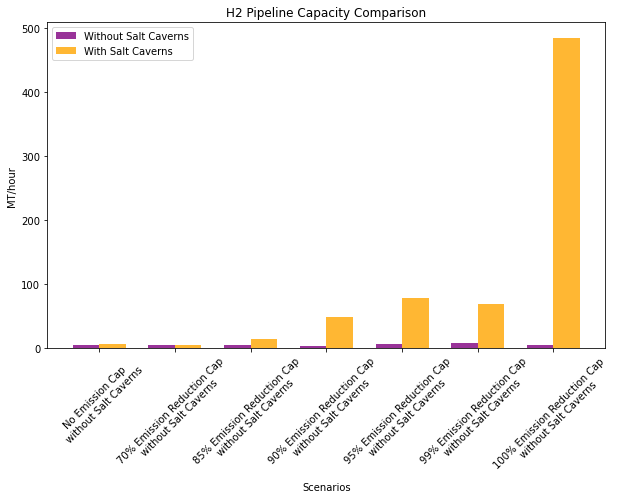

In [10]:

# Without caverns
h2_pipe_cap_list_no_caverns = []
for scenario in scenarios_no_caverns:
    df = open_results_file('HSC_pipeline_expansion.csv', scenario)
    new_h2_pipeline_cap_total = df['New_Trans_Capacity'].sum()
    h2_pipe_cap_list_no_caverns.append(new_h2_pipeline_cap_total)

# With caverns
h2_pipe_cap_list_with_caverns = []
for scenario in scenarios_with_caverns:
    df = open_results_file('HSC_pipeline_expansion.csv', scenario)
    new_h2_pipeline_cap_total = df['New_Trans_Capacity'].sum()
    h2_pipe_cap_list_with_caverns.append(new_h2_pipeline_cap_total)

    
# Settings for the bars
bar_width = 0.35
opacity = 0.8

# Rename scenarios
scenarios_renamed = [rename_dict[s] for s in scenarios_no_caverns]

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(h2_pipe_cap_list_no_caverns))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(r1, h2_pipe_cap_list_no_caverns, color='purple', width=bar_width, alpha=opacity, label='Without Salt Caverns')
plt.bar(r2, h2_pipe_cap_list_with_caverns, color='orange', width=bar_width, alpha=opacity, label='With Salt Caverns')

# Add labels, title, legend, etc
plt.xlabel('Scenarios')  
plt.ylabel('MT/hour')
plt.title('H2 Pipeline Capacity Comparison')
plt.xticks([r + bar_width / 2 for r in range(len(h2_pipe_cap_list_no_caverns))], scenarios_renamed, rotation=45)
plt.legend()

plt.show()


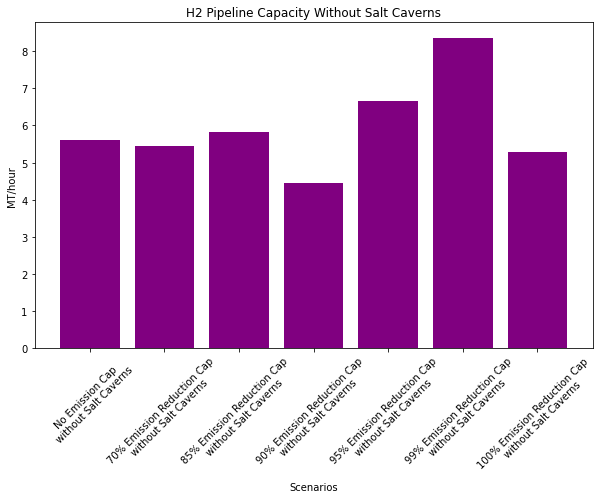

In [11]:
rename_dict= {
    'PJM_with_MI_no_caverns_0_red': 'No Emission Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_70_red': '70% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_85_red': '85% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_90_red': '90% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_95_red': '95% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_99_red': '99% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_100_red': '100% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_with_caverns_0_red': 'No Emission Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_70_red': '70% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_85_red': '85% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_90_red': '90% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_95_red': '95% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_99_red': '99% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_100_red': '100% Emission Reduction Cap\n with Salt Caverns'
}



h2_pipe_cap_list = []
for scenario in scenarios_no_caverns:
    df = open_results_file('HSC_pipeline_expansion.csv',scenario )
    new_h2_pipeline_cap_total = df['New_Trans_Capacity'].sum()
    h2_pipe_cap_list.append(new_h2_pipeline_cap_total)

# Rename scenarios
scenarios_renamed = [rename_dict[s] for s in scenarios]

plt.figure(figsize=(10,6))
plt.bar(scenarios_renamed, h2_pipe_cap_list, color='purple')
plt.xlabel('Scenarios')  
plt.ylabel('MT/hour')
plt.title('H2 Pipeline Capacity Without Salt Caverns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


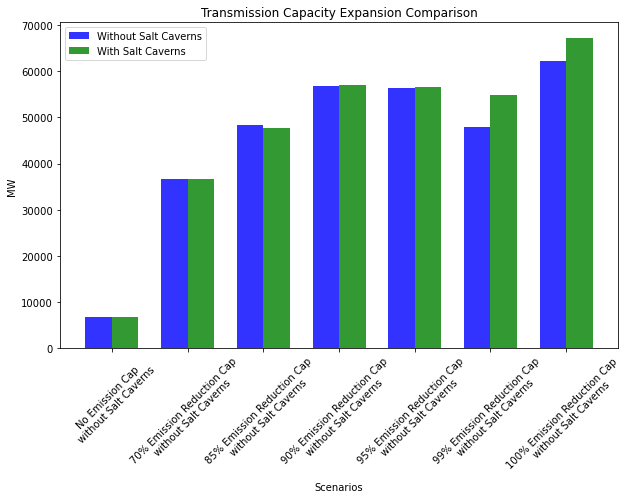

In [12]:
# Without caverns
trans_cap_list_no_caverns = []
for scenario in scenarios_no_caverns:
    df = open_results_file('network_expansion.csv', scenario)
    trans_cap_total = df['New_Trans_Capacity'].sum()
    trans_cap_list_no_caverns.append(trans_cap_total)

# With caverns
trans_cap_list_with_caverns = []
for scenario in scenarios_with_caverns:
    df = open_results_file('network_expansion.csv', scenario)
    trans_cap_total = df['New_Trans_Capacity'].sum()
    trans_cap_list_with_caverns.append(trans_cap_total)
    
# Settings for the bars
bar_width = 0.35
opacity = 0.8

# Rename scenarios
scenarios_renamed = [rename_dict[s] for s in scenarios_no_caverns]

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(h2_pipe_cap_list_no_caverns))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(r1, trans_cap_list_no_caverns, color='blue', width=bar_width, alpha=opacity, label='Without Salt Caverns')
plt.bar(r2, trans_cap_list_with_caverns, color='green', width=bar_width, alpha=opacity, label='With Salt Caverns')

# Add labels, title, legend, etc
plt.xlabel('Scenarios')  
plt.ylabel('MW')
plt.title('Transmission Capacity Expansion Comparison')
plt.xticks([r + bar_width / 2 for r in range(len(h2_pipe_cap_list_no_caverns))], scenarios_renamed, rotation=45)
plt.legend()

plt.show()


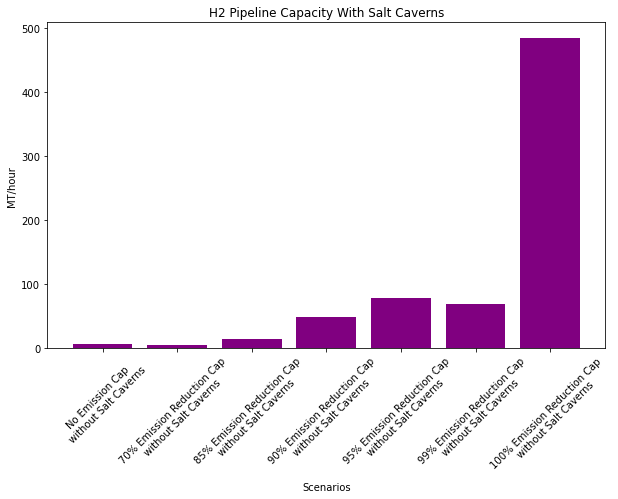

In [13]:
rename_dict= {
    'PJM_with_MI_no_caverns_0_red': 'No Emission Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_70_red': '70% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_85_red': '85% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_90_red': '90% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_95_red': '95% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_99_red': '99% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_100_red': '100% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_with_caverns_0_red': 'No Emission Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_70_red': '70% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_85_red': '85% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_90_red': '90% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_95_red': '95% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_99_red': '99% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_100_red': '100% Emission Reduction Cap\n with Salt Caverns'
}



h2_pipe_cap_list = []
for scenario in scenarios_with_caverns:
    df = open_results_file('HSC_pipeline_expansion.csv',scenario )
    new_h2_pipeline_cap_total = df['New_Trans_Capacity'].sum()
    h2_pipe_cap_list.append(new_h2_pipeline_cap_total)

# Rename scenarios
scenarios_renamed = [rename_dict[s] for s in scenarios]

plt.figure(figsize=(10,6))
plt.bar(scenarios_renamed, h2_pipe_cap_list, color='purple')
plt.xlabel('Scenarios')  
plt.ylabel('MT/hour')
plt.title('H2 Pipeline Capacity With Salt Caverns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [14]:
def compare_scenarios(scenarios_1, scenarios_2, operation, title=""):
    df_1 = operation(scenarios_1)
    df_2 = operation(scenarios_2)
    
    # Rename the indices of df_2 to match those of df_1
    df_2.index = df_2.index.str.replace("_with_cavern", "_no_cavern")
    
    missing_in_2 = df_1.index.difference(df_2.index)
    print("Scenarios present in 1 but missing in 2:", missing_in_2)

    missing_in_1 = df_2.index.difference(df_1.index)
    print("Scenarios present in 2 but missing in 1:", missing_in_1)
    
    assert (df_1.columns == df_2.columns).all(), "Tech_Types do not match."
    assert (df_1.index == df_2.index).all(), "Scenarios do not match."
    
    df_diff = df_2 - df_1
    
    df_diff = df_diff.dropna(how="all")

    
    plot_stacked_barchart(df_diff, title=title)
    return df_diff


Tech_Type                               Solar           Wind       Battery  \
PJM_with_MI_no_caverns_0_red     86757.752978   72085.531999  14757.816565   
PJM_with_MI_no_caverns_70_red   136076.290398  154296.934560  29703.493825   
PJM_with_MI_no_caverns_85_red   153054.848363  184363.890770  29522.204451   
PJM_with_MI_no_caverns_90_red   168292.389472  207639.364165  30422.304576   
PJM_with_MI_no_caverns_95_red   178566.359324  210856.800292  42151.597511   
PJM_with_MI_no_caverns_99_red   206640.468414  193329.317802  58820.192150   
PJM_with_MI_no_caverns_100_red  329044.331703  192197.458351  93646.185536   

Tech_Type                       Natural_gas_with_CCS            H2  \
PJM_with_MI_no_caverns_0_red                0.229202      6.517141   
PJM_with_MI_no_caverns_70_red               0.237258      0.569024   
PJM_with_MI_no_caverns_85_red               0.481546      0.572194   
PJM_with_MI_no_caverns_90_red               1.309567      1.102483   
PJM_with_MI_no_caverns_95

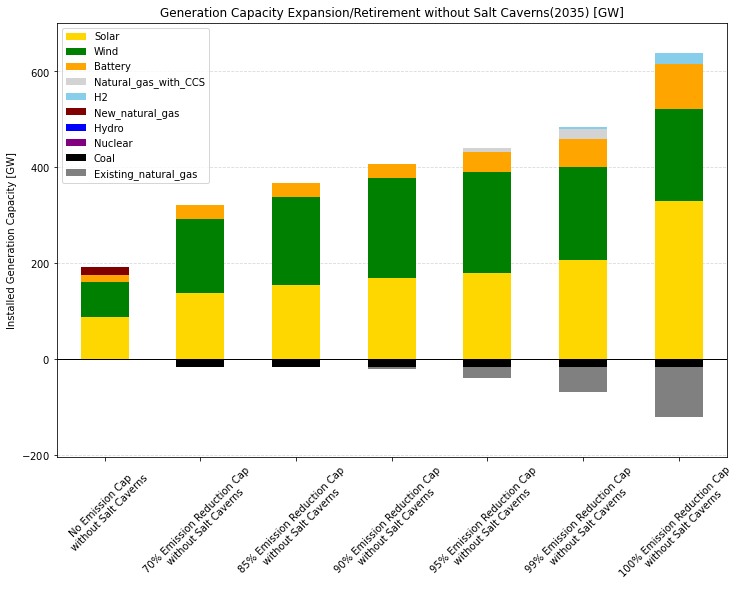

Tech_Type,Solar,Wind,Battery,Natural_gas_with_CCS,H2,New_natural_gas,Hydro,Nuclear,Coal,Existing_natural_gas
PJM_with_MI_no_caverns_0_red,86757.752978,72085.531999,14757.816565,0.229202,6.517141,18183.311264,0.0,-3549.781029,-0.075544,-0.238020
PJM_with_MI_no_caverns_70_red,136076.290398,154296.934560,29703.493825,0.237258,0.569024,2.801004,0.0,0.085555,-16950.882611,-0.010867
PJM_with_MI_no_caverns_85_red,153054.848363,184363.890770,29522.204451,0.481546,0.572194,0.706349,0.0,0.087236,-18294.487622,-0.052139
PJM_with_MI_no_caverns_90_red,168292.389472,207639.364165,30422.304576,1.309567,1.102483,0.588292,0.0,0.106702,-18294.645635,-3548.436794
PJM_with_MI_no_caverns_95_red,178566.359324,210856.800292,42151.597511,8057.630893,39.266734,2.087079,0.0,0.457350,-18293.113092,-22961.573006
PJM_with_MI_no_caverns_99_red,206640.468414,193329.317802,58820.192150,20186.024879,3499.402755,0.447239,0.0,0.129698,-18294.519221,-52105.365695
PJM_with_MI_no_caverns_100_red,329044.331703,192197.458351,93646.185536,0.000000,22234.588943,0.000000,0.0,5.576666,-18295.105000,-102975.488041


In [15]:
# No caverns generation retirement
title = 'Generation Capacity Expansion/Retirement without Salt Caverns(2035) [GW]'
y_label = 'Installed Generation Capacity [GW]'

generation_capacity_retirement_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)

Tech_Type                                 Solar           Wind       Battery  \
PJM_with_MI_with_caverns_0_red     86769.625613   72086.720631  14754.096361   
PJM_with_MI_with_caverns_70_red   136073.936877  154296.626663  29701.358249   
PJM_with_MI_with_caverns_85_red   153602.517540  184541.001141  29520.160475   
PJM_with_MI_with_caverns_90_red   167321.616414  208974.705612  30041.670147   
PJM_with_MI_with_caverns_95_red   179374.360753  212204.298911  41372.806853   
PJM_with_MI_with_caverns_99_red   205746.656595  197732.355381  54200.458070   
PJM_with_MI_with_caverns_100_red  323014.933543  193084.168784  85840.090633   

Tech_Type                                   H2  Natural_gas_with_CCS  \
PJM_with_MI_with_caverns_0_red       18.192857              1.103631   
PJM_with_MI_with_caverns_70_red       0.859965              0.340559   
PJM_with_MI_with_caverns_85_red       0.213538              0.146189   
PJM_with_MI_with_caverns_90_red       0.185363              0.154310   

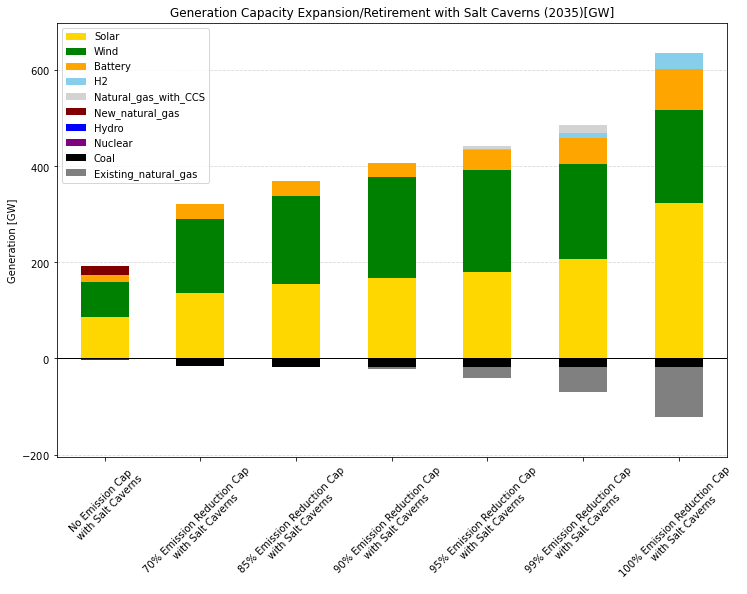

Tech_Type,Solar,Wind,Battery,H2,Natural_gas_with_CCS,New_natural_gas,Hydro,Nuclear,Coal,Existing_natural_gas
PJM_with_MI_with_caverns_0_red,86769.625613,72086.720631,14754.096361,18.192857,1.103631,18180.002513,0.0,-3555.570349,-0.305241,-1.104724
PJM_with_MI_with_caverns_70_red,136073.936877,154296.626663,29701.358249,0.859965,0.340559,3.028990,0.0,0.110905,-16949.909397,-0.013543
PJM_with_MI_with_caverns_85_red,153602.517540,184541.001141,29520.160475,0.213538,0.146189,0.256140,0.0,0.031246,-18294.862719,-0.017395
PJM_with_MI_with_caverns_90_red,167321.616414,208974.705612,30041.670147,0.185363,0.154310,0.089051,0.0,0.016851,-18295.025915,-2973.926021
PJM_with_MI_with_caverns_95_red,179374.360753,212204.298911,41372.806853,1340.405707,6908.934844,1.160133,0.0,0.335480,-18293.989022,-22652.500299
PJM_with_MI_with_caverns_99_red,205746.656595,197732.355381,54200.458070,11443.008068,15032.378787,0.200044,0.0,0.030272,-18294.798599,-51101.468307
PJM_with_MI_with_caverns_100_red,323014.933543,193084.168784,85840.090633,32591.171859,0.000000,0.000000,0.0,2.438944,-18295.105000,-102975.488258


In [16]:
# With caverns generation retirement
title = 'Generation Capacity Expansion/Retirement with Salt Caverns (2035)[GW]'
y_label = 'Generation [GW]'
generation_capacity_retirement_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)

Tech_Type                                Wind          Solar  \
PJM_with_MI_no_caverns_0_red     86778.551999   95078.033978   
PJM_with_MI_no_caverns_70_red   168989.954560  144396.571398   
PJM_with_MI_no_caverns_85_red   199056.910770  161375.129363   
PJM_with_MI_no_caverns_90_red   222332.384165  176612.670472   
PJM_with_MI_no_caverns_95_red   225549.820292  186886.640324   
PJM_with_MI_no_caverns_99_red   208022.337802  214960.749414   
PJM_with_MI_no_caverns_100_red  206890.478351  337364.612703   

Tech_Type                       Existing_natural_gas       Battery  \
PJM_with_MI_no_caverns_0_red           103798.349980  14757.816565   
PJM_with_MI_no_caverns_70_red          103798.577133  29703.493825   
PJM_with_MI_no_caverns_85_red          103798.535861  29522.204451   
PJM_with_MI_no_caverns_90_red          100250.151206  30422.304576   
PJM_with_MI_no_caverns_95_red           80837.014994  42151.597511   
PJM_with_MI_no_caverns_99_red           51693.222305  58820.192150 

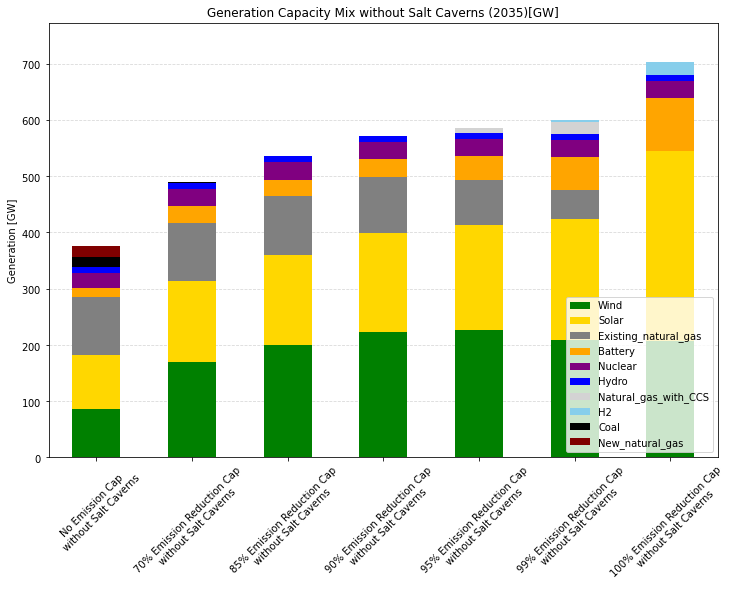

Tech_Type,Wind,Solar,Existing_natural_gas,Battery,Nuclear,Hydro,Natural_gas_with_CCS,H2,Coal,New_natural_gas
PJM_with_MI_no_caverns_0_red,86778.551999,95078.033978,103798.349980,14757.816565,26923.918971,11190.736,0.229202,6.517141,18295.029456,18183.311264
PJM_with_MI_no_caverns_70_red,168989.954560,144396.571398,103798.577133,29703.493825,30473.785555,11190.736,0.237258,0.569024,1344.222389,2.801004
PJM_with_MI_no_caverns_85_red,199056.910770,161375.129363,103798.535861,29522.204451,30473.787236,11190.736,0.481546,0.572194,0.617378,0.706349
PJM_with_MI_no_caverns_90_red,222332.384165,176612.670472,100250.151206,30422.304576,30473.806702,11190.736,1.309567,1.102483,0.459365,0.588292
PJM_with_MI_no_caverns_95_red,225549.820292,186886.640324,80837.014994,42151.597511,30474.157350,11190.736,8057.630893,39.266734,1.991908,2.087079
PJM_with_MI_no_caverns_99_red,208022.337802,214960.749414,51693.222305,58820.192150,30473.829698,11190.736,20186.024879,3499.402755,0.585779,0.447239
PJM_with_MI_no_caverns_100_red,206890.478351,337364.612703,823.099959,93646.185536,30479.276666,11190.736,0.000000,22234.588943,0.000000,0.000000


In [17]:
# With caverns generation retirement
title = 'Generation Capacity Mix without Salt Caverns (2035)[GW]'
y_label = 'Generation [GW]'
generation_capacity_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)

Tech_Type                                  Wind          Solar  \
PJM_with_MI_with_caverns_0_red     86779.740631   95089.906613   
PJM_with_MI_with_caverns_70_red   168989.646663  144394.217877   
PJM_with_MI_with_caverns_85_red   199234.021141  161922.798540   
PJM_with_MI_with_caverns_90_red   223667.725612  175641.897414   
PJM_with_MI_with_caverns_95_red   226897.318911  187694.641753   
PJM_with_MI_with_caverns_99_red   212425.375381  214066.937595   
PJM_with_MI_with_caverns_100_red  207777.188784  331335.214543   

Tech_Type                         Existing_natural_gas       Battery  \
PJM_with_MI_with_caverns_0_red           103797.483276  14754.096361   
PJM_with_MI_with_caverns_70_red          103798.574457  29701.358249   
PJM_with_MI_with_caverns_85_red          103798.570605  29520.160475   
PJM_with_MI_with_caverns_90_red          100824.661979  30041.670147   
PJM_with_MI_with_caverns_95_red           81146.087701  41372.806853   
PJM_with_MI_with_caverns_99_red        

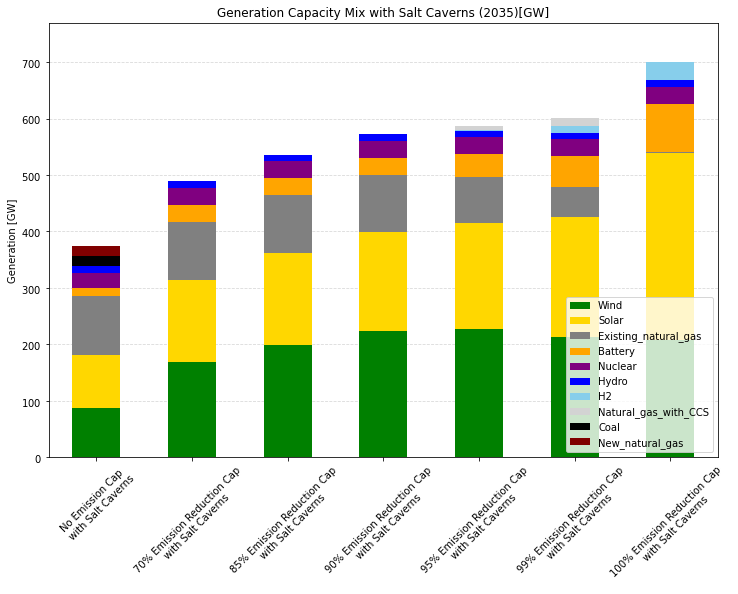

Tech_Type,Wind,Solar,Existing_natural_gas,Battery,Nuclear,Hydro,H2,Natural_gas_with_CCS,Coal,New_natural_gas
PJM_with_MI_with_caverns_0_red,86779.740631,95089.906613,103797.483276,14754.096361,26918.129651,11190.736,18.192857,1.103631,18294.799759,18180.002513
PJM_with_MI_with_caverns_70_red,168989.646663,144394.217877,103798.574457,29701.358249,30473.810905,11190.736,0.859965,0.340559,1345.195603,3.028990
PJM_with_MI_with_caverns_85_red,199234.021141,161922.798540,103798.570605,29520.160475,30473.731246,11190.736,0.213538,0.146189,0.242281,0.256140
PJM_with_MI_with_caverns_90_red,223667.725612,175641.897414,100824.661979,30041.670147,30473.716851,11190.736,0.185363,0.154310,0.079085,0.089051
PJM_with_MI_with_caverns_95_red,226897.318911,187694.641753,81146.087701,41372.806853,30474.035480,11190.736,1340.405707,6908.934844,1.115978,1.160133
PJM_with_MI_with_caverns_99_red,212425.375381,214066.937595,52697.119693,54200.458070,30473.730272,11190.736,11443.008068,15032.378787,0.306401,0.200044
PJM_with_MI_with_caverns_100_red,207777.188784,331335.214543,823.099742,85840.090633,30476.138944,11190.736,32591.171859,0.000000,0.000000,0.000000


In [18]:
# With caverns generation retirement
title = 'Generation Capacity Mix with Salt Caverns (2035)[GW]'
y_label = 'Generation [GW]'
generation_capacity_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)

Tech_Type                               Wind         Solar       Nuclear  \
0                                                                          
PJM_with_MI_no_caverns_0_red    3.211877e+08  1.777261e+08  2.332501e+08   
PJM_with_MI_no_caverns_70_red   6.040753e+08  2.589149e+08  2.388385e+08   
PJM_with_MI_no_caverns_85_red   6.858143e+08  2.815163e+08  2.221480e+08   
PJM_with_MI_no_caverns_90_red   7.528899e+08  3.026658e+08  2.110736e+08   
PJM_with_MI_no_caverns_95_red   7.638304e+08  3.200890e+08  2.042352e+08   
PJM_with_MI_no_caverns_99_red   7.247256e+08  3.683296e+08  2.044092e+08   
PJM_with_MI_no_caverns_100_red  7.135534e+08  5.511628e+08  1.407829e+08   

Tech_Type                       Existing_natural_gas         Hydro  \
0                                                                    
PJM_with_MI_no_caverns_0_red            2.926944e+08  1.920695e+07   
PJM_with_MI_no_caverns_70_red           1.912079e+08  2.323594e+07   
PJM_with_MI_no_caverns_85_red      

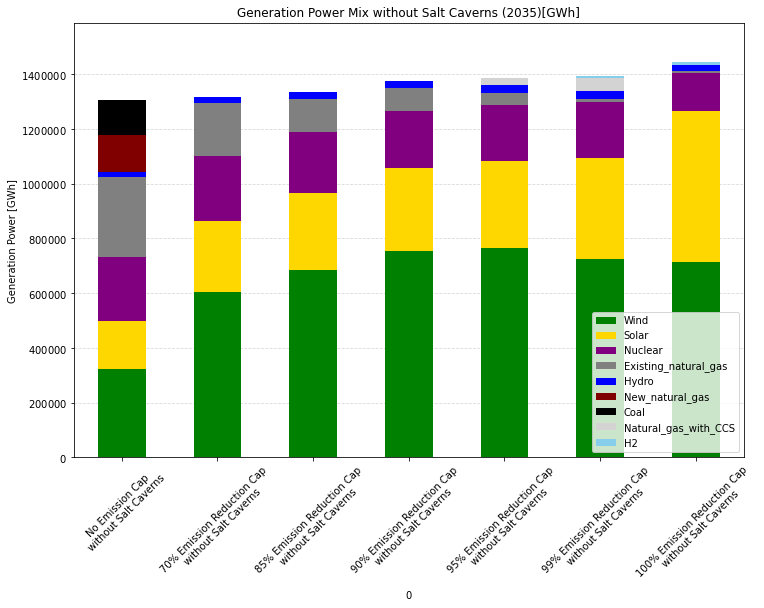

Tech_Type,Wind,Solar,Nuclear,Existing_natural_gas,Hydro,New_natural_gas,Coal,Natural_gas_with_CCS,H2
0,,,,,,,,,
PJM_with_MI_no_caverns_0_red,3.211877e+08,1.777261e+08,2.332501e+08,2.926944e+08,1.920695e+07,1.347879e+08,1.261214e+08,1.060429e+03,2.470690e+03
PJM_with_MI_no_caverns_70_red,6.040753e+08,2.589149e+08,2.388385e+08,1.912079e+08,2.323594e+07,1.285716e+04,5.115907e+03,1.376793e+03,2.783117e+02
PJM_with_MI_no_caverns_85_red,6.858143e+08,2.815163e+08,2.221480e+08,1.198791e+08,2.643903e+07,1.967360e+03,2.150355e+02,2.601279e+03,6.704703e+02
PJM_with_MI_no_caverns_90_red,7.528899e+08,3.026658e+08,2.110736e+08,8.231830e+07,2.711987e+07,1.476650e+03,1.685262e+02,5.525001e+03,1.594314e+03
PJM_with_MI_no_caverns_95_red,7.638304e+08,3.200890e+08,2.042352e+08,4.449576e+07,2.692493e+07,4.269931e+03,5.390591e+02,2.567673e+07,4.659498e+04
PJM_with_MI_no_caverns_99_red,7.247256e+08,3.683296e+08,2.044092e+08,1.343818e+07,2.582833e+07,3.150088e+02,5.069138e+01,5.088279e+07,3.747708e+06
PJM_with_MI_no_caverns_100_red,7.135534e+08,5.511628e+08,1.407829e+08,5.393304e+06,2.334721e+07,0.000000e+00,0.000000e+00,0.000000e+00,9.842420e+06


In [19]:
# With caverns generation retirement
title = 'Generation Power Mix without Salt Caverns (2035)[GWh]'
y_label = 'Generation Power [GWh]'
generation_power_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)


Tech_Type                                 Wind         Solar       Nuclear  \
0                                                                            
PJM_with_MI_with_caverns_0_red    3.211943e+08  1.777446e+08  2.331939e+08   
PJM_with_MI_with_caverns_70_red   6.036145e+08  2.593612e+08  2.388422e+08   
PJM_with_MI_with_caverns_85_red   6.877530e+08  2.828722e+08  2.227806e+08   
PJM_with_MI_with_caverns_90_red   7.574744e+08  3.019845e+08  2.104600e+08   
PJM_with_MI_with_caverns_95_red   7.679541e+08  3.215051e+08  2.038503e+08   
PJM_with_MI_with_caverns_99_red   7.370821e+08  3.672615e+08  2.035471e+08   
PJM_with_MI_with_caverns_100_red  7.200998e+08  5.528791e+08  1.418548e+08   

Tech_Type                         Existing_natural_gas         Hydro  \
0                                                                      
PJM_with_MI_with_caverns_0_red            2.927927e+08  1.920861e+07   
PJM_with_MI_with_caverns_70_red           1.912142e+08  2.323781e+07   
PJM_with_

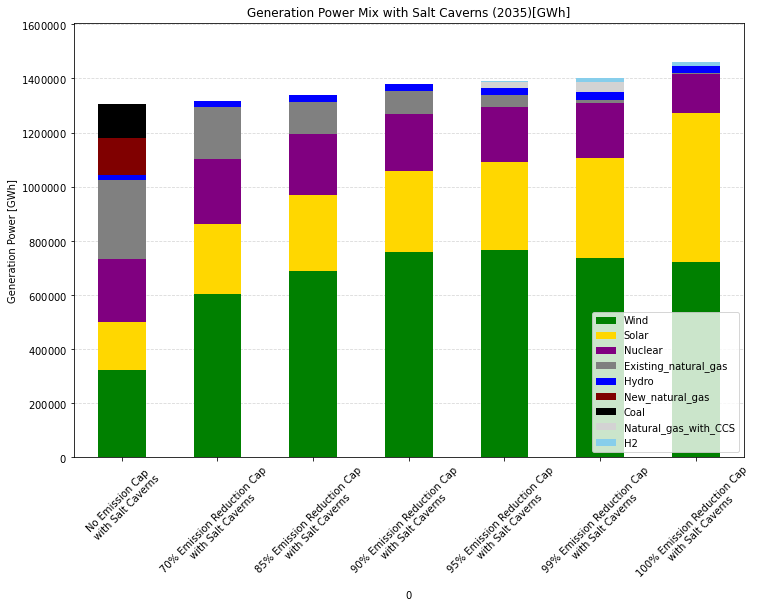

Tech_Type,Wind,Solar,Nuclear,Existing_natural_gas,Hydro,New_natural_gas,Coal,Natural_gas_with_CCS,H2
0,,,,,,,,,
PJM_with_MI_with_caverns_0_red,3.211943e+08,1.777446e+08,2.331939e+08,2.927927e+08,1.920861e+07,1.347573e+08,1.260967e+08,5.262874e+03,8.776820e+03
PJM_with_MI_with_caverns_70_red,6.036145e+08,2.593612e+08,2.388422e+08,1.912142e+08,2.323781e+07,1.348833e+04,5.167800e+03,1.973475e+03,4.485438e+02
PJM_with_MI_with_caverns_85_red,6.877530e+08,2.828722e+08,2.227806e+08,1.200139e+08,2.641902e+07,7.697683e+02,9.054312e+01,7.828040e+02,2.247702e+02
PJM_with_MI_with_caverns_90_red,7.574744e+08,3.019845e+08,2.104600e+08,8.222187e+07,2.703531e+07,2.235351e+02,2.871142e+01,6.802289e+02,2.783031e+02
PJM_with_MI_with_caverns_95_red,7.679541e+08,3.215051e+08,2.038503e+08,4.437704e+07,2.692475e+07,2.239684e+03,2.647943e+02,2.335254e+07,2.151232e+06
PJM_with_MI_with_caverns_99_red,7.370821e+08,3.672615e+08,2.035471e+08,1.351416e+07,2.685081e+07,1.583285e+02,2.528531e+01,4.005402e+07,1.286144e+07
PJM_with_MI_with_caverns_100_red,7.200998e+08,5.528791e+08,1.418548e+08,5.441427e+06,2.382580e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.637667e+07


In [20]:
# With caverns generation retirement
title = 'Generation Power Mix with Salt Caverns (2035)[GWh]'
y_label = 'Generation Power [GWh]'
generation_power_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)


Tech_Type                       ATR_wCCS_94pct  Electrolyzer   Large_SMR  \
PJM_with_MI_no_caverns_0_red          0.006794      0.006163  224.308710   
PJM_with_MI_no_caverns_70_red         0.015666      0.113356  224.211590   
PJM_with_MI_no_caverns_85_red         0.081860     50.241075    5.233724   
PJM_with_MI_no_caverns_90_red         0.088355    191.244758    0.060501   
PJM_with_MI_no_caverns_95_red         0.230755    210.322410    0.098471   
PJM_with_MI_no_caverns_99_red         0.049762    228.729090    0.015583   
PJM_with_MI_no_caverns_100_red        0.000000    566.106022    0.000000   

Tech_Type                       Large_SMR_wCCS_96pct  
PJM_with_MI_no_caverns_0_red                0.015442  
PJM_with_MI_no_caverns_70_red               0.029964  
PJM_with_MI_no_caverns_85_red             205.635025  
PJM_with_MI_no_caverns_90_red             149.524254  
PJM_with_MI_no_caverns_95_red             123.026418  
PJM_with_MI_no_caverns_99_red             133.663603  
PJM_wi

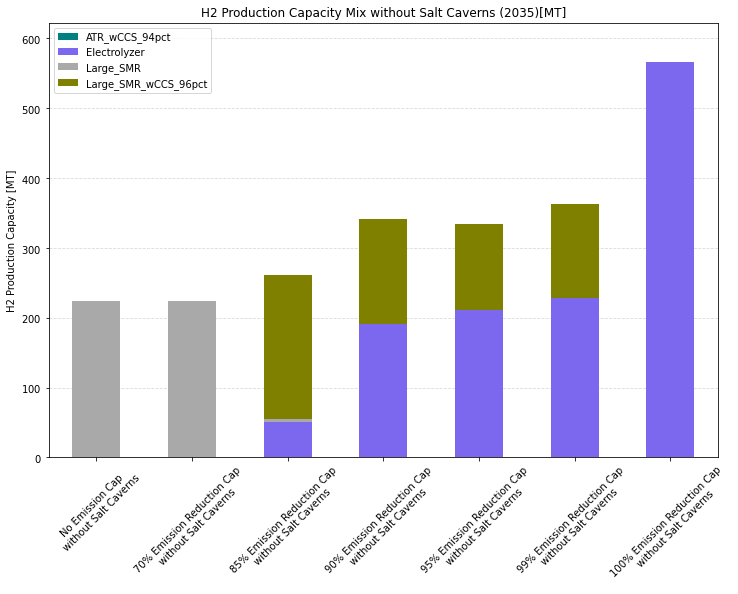

Tech_Type,ATR_wCCS_94pct,Electrolyzer,Large_SMR,Large_SMR_wCCS_96pct
No Emission Cap\n without Salt Caverns,0.006794,0.006163,224.308710,0.015442
70% Emission Reduction Cap\n without Salt Caverns,0.015666,0.113356,224.211590,0.029964
85% Emission Reduction Cap\n without Salt Caverns,0.081860,50.241075,5.233724,205.635025
90% Emission Reduction Cap\n without Salt Caverns,0.088355,191.244758,0.060501,149.524254
95% Emission Reduction Cap\n without Salt Caverns,0.230755,210.322410,0.098471,123.026418
99% Emission Reduction Cap\n without Salt Caverns,0.049762,228.729090,0.015583,133.663603
100% Emission Reduction Cap\n without Salt Caverns,0.000000,566.106022,0.000000,0.000000


In [21]:
# With caverns generation retirement
title = 'H2 Production Capacity Mix without Salt Caverns (2035)[MT]'
y_label = 'H2 Production Capacity [MT]'
h2_capacity_generation(scenarios=scenarios_no_caverns, title=title, y_label=y_label)


Tech_Type                         ATR_wCCS_94pct  Electrolyzer   Large_SMR  \
PJM_with_MI_with_caverns_0_red          0.026079      0.026150  224.359832   
PJM_with_MI_with_caverns_70_red         0.022267      0.154074  224.183241   
PJM_with_MI_with_caverns_85_red         0.029304     68.610149    2.931895   
PJM_with_MI_with_caverns_90_red         0.009940    204.884175    0.007209   
PJM_with_MI_with_caverns_95_red         0.148551    223.310148    0.033482   
PJM_with_MI_with_caverns_99_red         0.027340    259.439344    0.006543   
PJM_with_MI_with_caverns_100_red        0.000000    819.956130    0.000000   

Tech_Type                         Large_SMR_wCCS_96pct  
PJM_with_MI_with_caverns_0_red                0.068446  
PJM_with_MI_with_caverns_70_red               0.044469  
PJM_with_MI_with_caverns_85_red             199.351040  
PJM_with_MI_with_caverns_90_red             143.513529  
PJM_with_MI_with_caverns_95_red             124.430939  
PJM_with_MI_with_caverns_99_red  

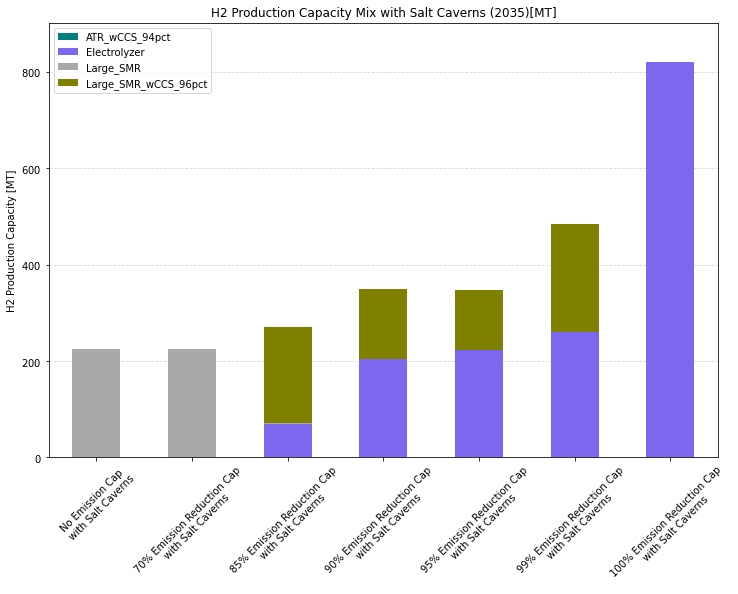

Tech_Type,ATR_wCCS_94pct,Electrolyzer,Large_SMR,Large_SMR_wCCS_96pct
No Emission Cap\n with Salt Caverns,0.026079,0.026150,224.359832,0.068446
70% Emission Reduction Cap\n with Salt Caverns,0.022267,0.154074,224.183241,0.044469
85% Emission Reduction Cap\n with Salt Caverns,0.029304,68.610149,2.931895,199.351040
90% Emission Reduction Cap\n with Salt Caverns,0.009940,204.884175,0.007209,143.513529
95% Emission Reduction Cap\n with Salt Caverns,0.148551,223.310148,0.033482,124.430939
99% Emission Reduction Cap\n with Salt Caverns,0.027340,259.439344,0.006543,224.667514
100% Emission Reduction Cap\n with Salt Caverns,0.000000,819.956130,0.000000,0.000000


In [22]:
# With caverns generation retirement
title = 'H2 Production Capacity Mix with Salt Caverns (2035)[MT]'
y_label = 'H2 Production Capacity [MT]'
h2_capacity_generation(scenarios=scenarios_with_caverns, title=title, y_label=y_label)


Tech_Type                       ATR_wCCS_94pct  Electrolyzer     Large_SMR  \
PJM_with_MI_no_caverns_0_red         52.199059  2.092779e+01  1.768190e+06   
PJM_with_MI_no_caverns_70_red       120.727319  4.225574e+02  1.767464e+06   
PJM_with_MI_no_caverns_85_red       632.282906  2.445495e+05  1.305595e+04   
PJM_with_MI_no_caverns_90_red       680.117489  1.062909e+06  1.032626e+02   
PJM_with_MI_no_caverns_95_red      1774.233321  1.212530e+06  1.270874e+02   
PJM_with_MI_no_caverns_99_red       382.766611  1.306565e+06  3.974067e+00   
PJM_with_MI_no_caverns_100_red        0.000000  2.223267e+06  0.000000e+00   

Tech_Type                       Large_SMR_wCCS_96pct  
PJM_with_MI_no_caverns_0_red            7.638511e+01  
PJM_with_MI_no_caverns_70_red           2.128923e+02  
PJM_with_MI_no_caverns_85_red           1.510002e+06  
PJM_with_MI_no_caverns_90_red           7.045943e+05  
PJM_with_MI_no_caverns_95_red           5.560588e+05  
PJM_with_MI_no_caverns_99_red           6.344

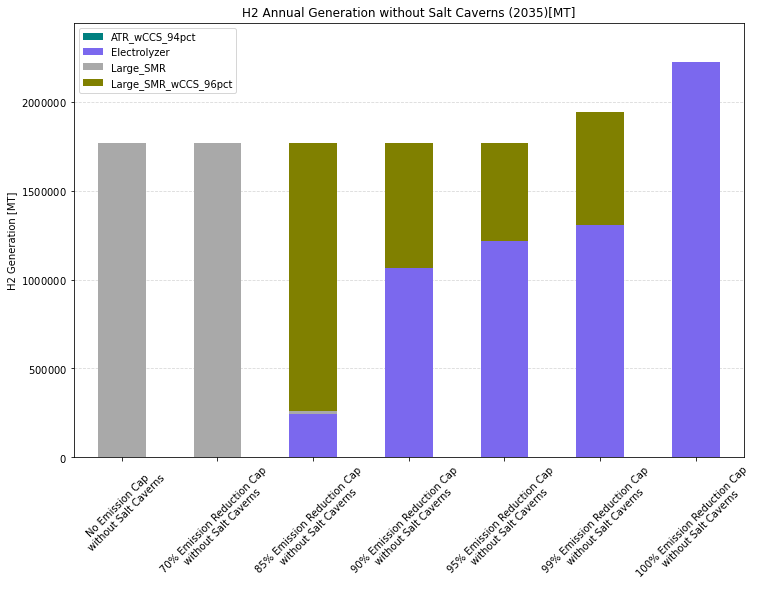

Tech_Type,ATR_wCCS_94pct,Electrolyzer,Large_SMR,Large_SMR_wCCS_96pct
No Emission Cap\n without Salt Caverns,52.199059,2.092779e+01,1.768190e+06,7.638511e+01
70% Emission Reduction Cap\n without Salt Caverns,120.727319,4.225574e+02,1.767464e+06,2.128923e+02
85% Emission Reduction Cap\n without Salt Caverns,632.282906,2.445495e+05,1.305595e+04,1.510002e+06
90% Emission Reduction Cap\n without Salt Caverns,680.117489,1.062909e+06,1.032626e+02,7.045943e+05
95% Emission Reduction Cap\n without Salt Caverns,1774.233321,1.212530e+06,1.270874e+02,5.560588e+05
99% Emission Reduction Cap\n without Salt Caverns,382.766611,1.306565e+06,3.974067e+00,6.344139e+05
100% Emission Reduction Cap\n without Salt Caverns,0.000000,2.223267e+06,0.000000e+00,0.000000e+00


In [23]:
# With caverns generation retirement
title = 'H2 Annual Generation without Salt Caverns (2035)[MT]'
y_label = 'H2 Generation [MT]'
h2_generation(scenarios=scenarios_no_caverns, title=title, y_label=y_label)

Tech_Type                         ATR_wCCS_94pct  Electrolyzer     Large_SMR  \
PJM_with_MI_with_caverns_0_red        199.833238  8.946538e+01  1.768051e+06   
PJM_with_MI_with_caverns_70_red       171.519555  5.765923e+02  1.767165e+06   
PJM_with_MI_with_caverns_85_red       226.464016  3.329736e+05  7.892359e+03   
PJM_with_MI_with_caverns_90_red        76.517943  1.126400e+06  1.359543e+01   
PJM_with_MI_with_caverns_95_red      1144.628636  1.302220e+06  4.890913e+01   
PJM_with_MI_with_caverns_99_red       210.278444  1.456279e+06  1.824684e+00   
PJM_with_MI_with_caverns_100_red        0.000000  2.531107e+06  0.000000e+00   

Tech_Type                         Large_SMR_wCCS_96pct  
PJM_with_MI_with_caverns_0_red            3.266867e+02  
PJM_with_MI_with_caverns_70_red           3.153221e+02  
PJM_with_MI_with_caverns_85_red           1.427125e+06  
PJM_with_MI_with_caverns_90_red           6.417298e+05  
PJM_with_MI_with_caverns_95_red           5.642110e+05  
PJM_with_MI_with_

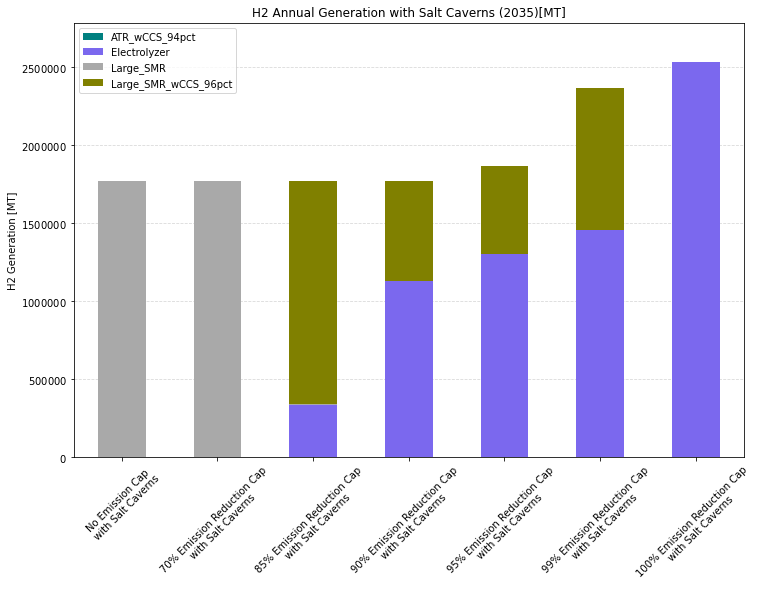

Tech_Type,ATR_wCCS_94pct,Electrolyzer,Large_SMR,Large_SMR_wCCS_96pct
No Emission Cap\n with Salt Caverns,199.833238,8.946538e+01,1.768051e+06,3.266867e+02
70% Emission Reduction Cap\n with Salt Caverns,171.519555,5.765923e+02,1.767165e+06,3.153221e+02
85% Emission Reduction Cap\n with Salt Caverns,226.464016,3.329736e+05,7.892359e+03,1.427125e+06
90% Emission Reduction Cap\n with Salt Caverns,76.517943,1.126400e+06,1.359543e+01,6.417298e+05
95% Emission Reduction Cap\n with Salt Caverns,1144.628636,1.302220e+06,4.890913e+01,5.642110e+05
99% Emission Reduction Cap\n with Salt Caverns,210.278444,1.456279e+06,1.824684e+00,9.077520e+05
100% Emission Reduction Cap\n with Salt Caverns,0.000000,2.531107e+06,0.000000e+00,0.000000e+00


In [24]:
# With caverns generation retirement
title = 'H2 Annual Generation with Salt Caverns (2035)[MT]'
y_label = 'H2 Generation [MT]'
h2_generation(scenarios=scenarios_with_caverns, title=title, y_label=y_label)

Tech_Type                       Above_ground_storage
PJM_with_MI_no_caverns_0_red                0.303949
PJM_with_MI_no_caverns_70_red               0.207288
PJM_with_MI_no_caverns_85_red             637.457901
PJM_with_MI_no_caverns_90_red            3851.640487
PJM_with_MI_no_caverns_95_red            5562.698506
PJM_with_MI_no_caverns_99_red            8923.435900
PJM_with_MI_no_caverns_100_red          57918.423721


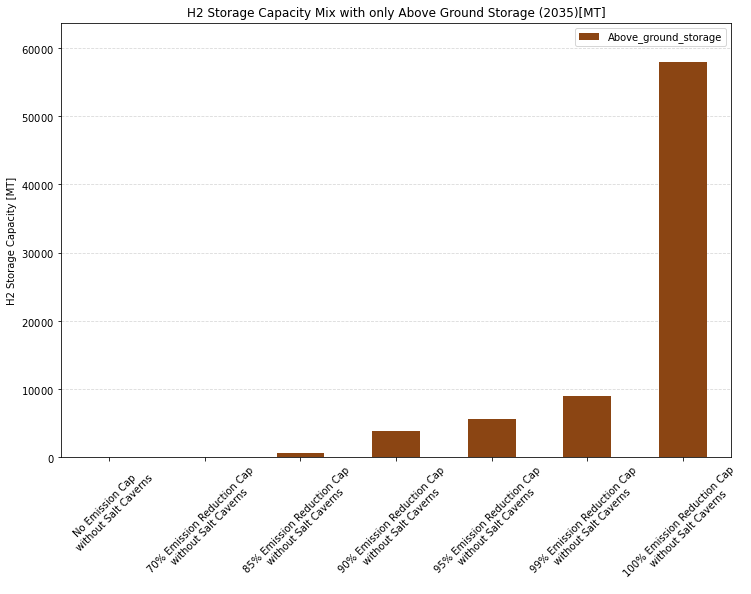

Tech_Type,Above_ground_storage
No Emission Cap\n without Salt Caverns,0.303949
70% Emission Reduction Cap\n without Salt Caverns,0.207288
85% Emission Reduction Cap\n without Salt Caverns,637.457901
90% Emission Reduction Cap\n without Salt Caverns,3851.640487
95% Emission Reduction Cap\n without Salt Caverns,5562.698506
99% Emission Reduction Cap\n without Salt Caverns,8923.435900
100% Emission Reduction Cap\n without Salt Caverns,57918.423721


In [25]:
# With caverns generation retirement
title = 'H2 Storage Capacity Mix with only Above Ground Storage (2035)[MT]'
y_label = 'H2 Storage Capacity [MT]'
h2_storage_capacity_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)


Tech_Type                         Salt_cavern_storage  Above_ground_storage
PJM_with_MI_with_caverns_0_red               1.527910              1.780224
PJM_with_MI_with_caverns_70_red              0.410334              0.309900
PJM_with_MI_with_caverns_85_red            793.502293            561.654380
PJM_with_MI_with_caverns_90_red           3869.562603           1449.316386
PJM_with_MI_with_caverns_95_red           6689.630376           1524.876558
PJM_with_MI_with_caverns_99_red          17132.049865           2188.966038
PJM_with_MI_with_caverns_100_red         89200.020803           6242.095261


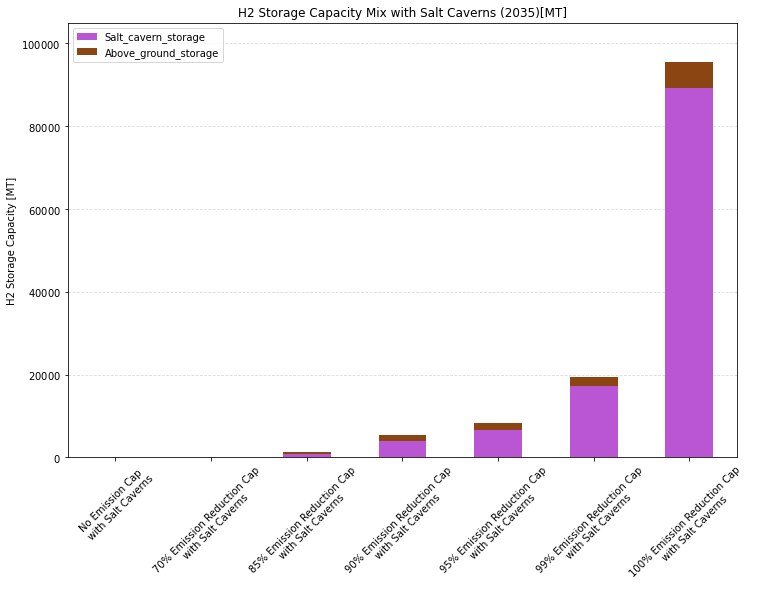

Tech_Type,Salt_cavern_storage,Above_ground_storage
No Emission Cap\n with Salt Caverns,1.527910,1.780224
70% Emission Reduction Cap\n with Salt Caverns,0.410334,0.309900
85% Emission Reduction Cap\n with Salt Caverns,793.502293,561.654380
90% Emission Reduction Cap\n with Salt Caverns,3869.562603,1449.316386
95% Emission Reduction Cap\n with Salt Caverns,6689.630376,1524.876558
99% Emission Reduction Cap\n with Salt Caverns,17132.049865,2188.966038
100% Emission Reduction Cap\n with Salt Caverns,89200.020803,6242.095261


In [26]:
# With caverns generation retirement
title = 'H2 Storage Capacity Mix with Salt Caverns (2035)[MT]'
y_label = 'H2 Storage Capacity [MT]'
h2_storage_capacity_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)


In [27]:
def compare_scenarios(scenarios_1, scenarios_2, operation, units=1, title="", y_label=""):
    
    df_1 = operation(scenarios_1, title="", y_label="")
    df_2 = operation(scenarios_2, title="", y_label="")
    
    # Rename the indices of df_2 to match those of df_1
    df_2.index = df_2.index.str.replace("_with_cavern", "_no_cavern")
    df_2.index = df_2.index.str.replace("with Salt Caverns", "without Salt Caverns")
    
    missing_in_2 = df_1.index.difference(df_2.index)
    print("Scenarios present in 1 but missing in 2:", missing_in_2)

    missing_in_1 = df_2.index.difference(df_1.index)
    print("Scenarios present in 2 but missing in 1:", missing_in_1)
    

    
    #assert (df_1.columns == df_2.columns).all(), "Tech_Types do not match."
    #assert (df_1.index == df_2.index).all(), "Scenarios do not match."
    
    df_diff = df_2 - df_1
    

    
    df_diff = df_diff.dropna(how="all")
    

    
    plot_stacked_barchart(df_diff, title=title, y_label=y_label, units=units, comparing=True)
    return df_diff




# Yearly Generation [GWh]

Tech_Type                               Wind         Solar       Nuclear  \
0                                                                          
PJM_with_MI_no_caverns_0_red    3.211877e+08  1.777261e+08  2.332501e+08   
PJM_with_MI_no_caverns_70_red   6.040753e+08  2.589149e+08  2.388385e+08   
PJM_with_MI_no_caverns_85_red   6.858143e+08  2.815163e+08  2.221480e+08   
PJM_with_MI_no_caverns_90_red   7.528899e+08  3.026658e+08  2.110736e+08   
PJM_with_MI_no_caverns_95_red   7.638304e+08  3.200890e+08  2.042352e+08   
PJM_with_MI_no_caverns_99_red   7.247256e+08  3.683296e+08  2.044092e+08   
PJM_with_MI_no_caverns_100_red  7.135534e+08  5.511628e+08  1.407829e+08   

Tech_Type                       Existing_natural_gas         Hydro  \
0                                                                    
PJM_with_MI_no_caverns_0_red            2.926944e+08  1.920695e+07   
PJM_with_MI_no_caverns_70_red           1.912079e+08  2.323594e+07   
PJM_with_MI_no_caverns_85_red      

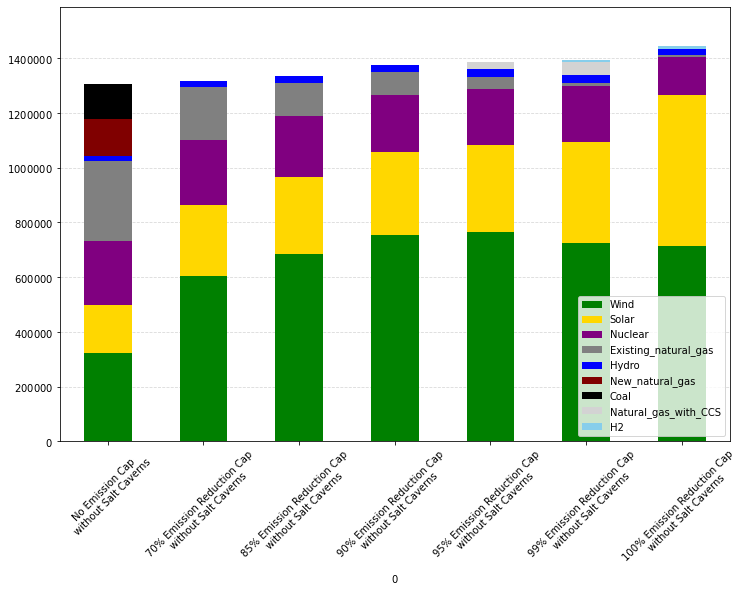

Tech_Type                                 Wind         Solar       Nuclear  \
0                                                                            
PJM_with_MI_with_caverns_0_red    3.211943e+08  1.777446e+08  2.331939e+08   
PJM_with_MI_with_caverns_70_red   6.036145e+08  2.593612e+08  2.388422e+08   
PJM_with_MI_with_caverns_85_red   6.877530e+08  2.828722e+08  2.227806e+08   
PJM_with_MI_with_caverns_90_red   7.574744e+08  3.019845e+08  2.104600e+08   
PJM_with_MI_with_caverns_95_red   7.679541e+08  3.215051e+08  2.038503e+08   
PJM_with_MI_with_caverns_99_red   7.370821e+08  3.672615e+08  2.035471e+08   
PJM_with_MI_with_caverns_100_red  7.200998e+08  5.528791e+08  1.418548e+08   

Tech_Type                         Existing_natural_gas         Hydro  \
0                                                                      
PJM_with_MI_with_caverns_0_red            2.927927e+08  1.920861e+07   
PJM_with_MI_with_caverns_70_red           1.912142e+08  2.323781e+07   
PJM_with_

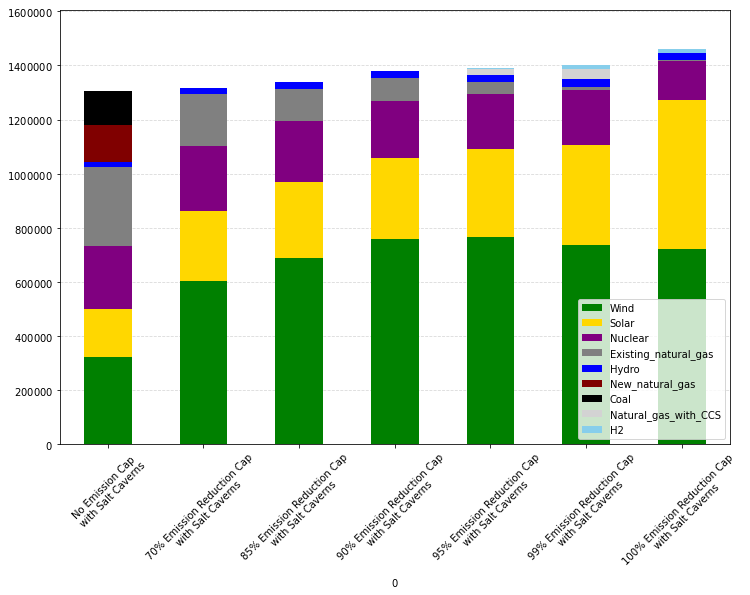

Scenarios present in 1 but missing in 2: Index([], dtype='object', name=0)
Scenarios present in 2 but missing in 1: Index([], dtype='object', name=0)
Tech_Type                               Wind         Solar       Nuclear  \
0                                                                          
PJM_with_MI_no_caverns_0_red    6.627574e+03  1.844370e+04 -5.619229e+04   
PJM_with_MI_no_caverns_70_red  -4.607792e+05  4.462897e+05  3.711329e+03   
PJM_with_MI_no_caverns_85_red   1.938689e+06  1.355878e+06  6.325998e+05   
PJM_with_MI_no_caverns_90_red   4.584513e+06 -6.812649e+05 -6.136555e+05   
PJM_with_MI_no_caverns_95_red   4.123643e+06  1.416146e+06 -3.848948e+05   
PJM_with_MI_no_caverns_99_red   1.235652e+07 -1.068075e+06 -8.621601e+05   
PJM_with_MI_no_caverns_100_red  6.546458e+06  1.716314e+06  1.071994e+06   

Tech_Type                       Existing_natural_gas         Hydro  \
0                                                                    
PJM_with_MI_no_caverns_0_

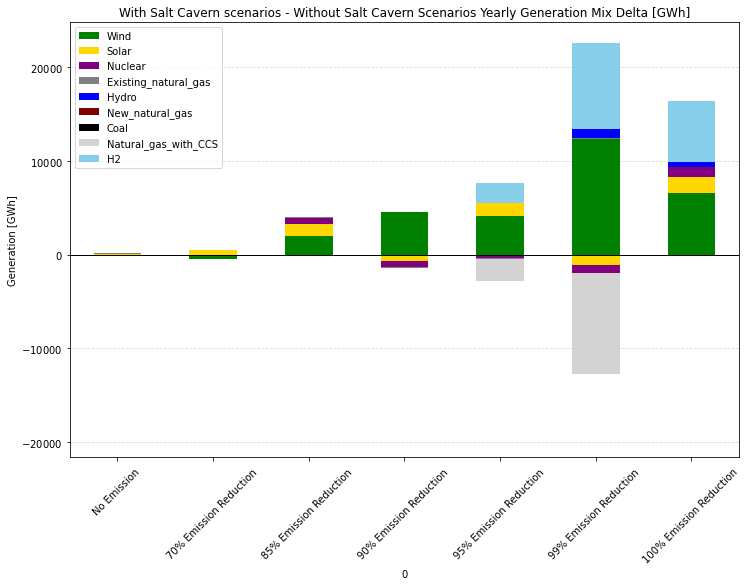

In [28]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Yearly Generation Mix Delta [GWh]"
y_label = "Generation [GWh]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, generation_power_barchart, title=title, y_label=y_label)

# Installed Capacity [GW]

Tech_Type                                Wind          Solar  \
PJM_with_MI_no_caverns_0_red     86747.838894   94687.268704   
PJM_with_MI_no_caverns_70_red   168989.954560  144396.571398   
PJM_with_MI_no_caverns_85_red   199056.910770  161375.129363   
PJM_with_MI_no_caverns_90_red   222332.384165  176612.670472   
PJM_with_MI_no_caverns_95_red   225549.820292  186886.640324   
PJM_with_MI_no_caverns_99_red   208022.337802  214960.749414   
PJM_with_MI_no_caverns_100_red  206890.478351  337364.612703   

Tech_Type                       Existing_natural_gas       Battery  \
PJM_with_MI_no_caverns_0_red           103798.577901  14709.650959   
PJM_with_MI_no_caverns_70_red          103798.577133  29703.493825   
PJM_with_MI_no_caverns_85_red          103798.535861  29522.204451   
PJM_with_MI_no_caverns_90_red          100250.151206  30422.304576   
PJM_with_MI_no_caverns_95_red           80837.014994  42151.597511   
PJM_with_MI_no_caverns_99_red           51693.222305  58820.192150 

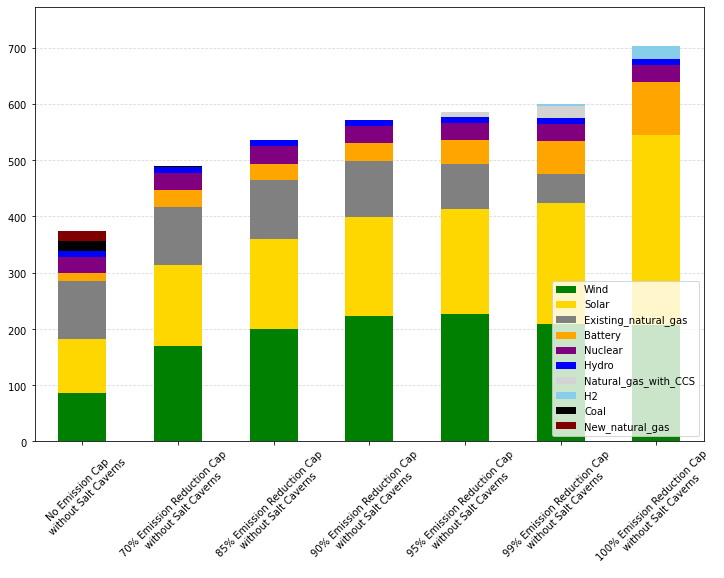

Tech_Type                                  Wind          Solar  \
PJM_with_MI_with_caverns_0_red     86779.740631   95089.906613   
PJM_with_MI_with_caverns_70_red   168989.646663  144394.217877   
PJM_with_MI_with_caverns_85_red   199234.021141  161922.798540   
PJM_with_MI_with_caverns_90_red   223667.725612  175641.897414   
PJM_with_MI_with_caverns_95_red   226897.318911  187694.641753   
PJM_with_MI_with_caverns_99_red   212425.375381  214066.937595   
PJM_with_MI_with_caverns_100_red  207777.188784  331335.214543   

Tech_Type                         Existing_natural_gas       Battery  \
PJM_with_MI_with_caverns_0_red           103797.483276  14754.096361   
PJM_with_MI_with_caverns_70_red          103798.574457  29701.358249   
PJM_with_MI_with_caverns_85_red          103798.570605  29520.160475   
PJM_with_MI_with_caverns_90_red          100824.661979  30041.670147   
PJM_with_MI_with_caverns_95_red           81146.087701  41372.806853   
PJM_with_MI_with_caverns_99_red        

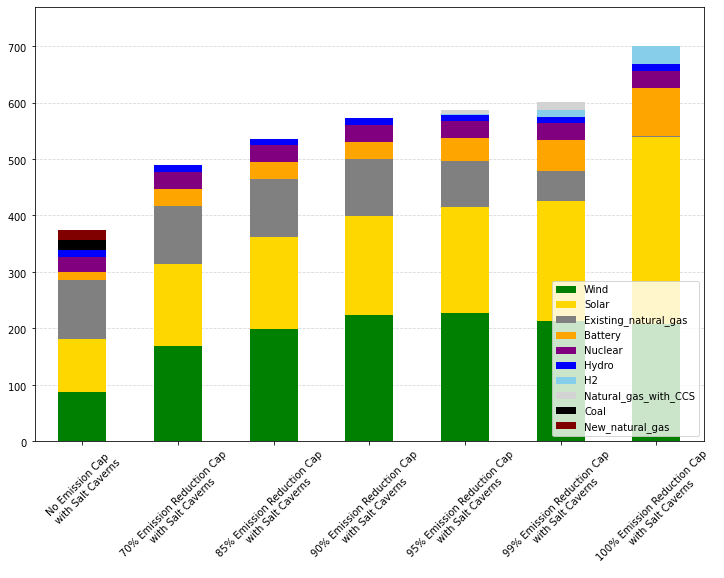

Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')
Tech_Type                           Battery      Coal  Existing_natural_gas  \
PJM_with_MI_no_caverns_0_red      44.445403 -0.304451             -1.094624   
PJM_with_MI_no_caverns_70_red     -2.135576  0.973214             -0.002676   
PJM_with_MI_no_caverns_85_red     -2.043976 -0.375097              0.034744   
PJM_with_MI_no_caverns_90_red   -380.634429 -0.380280            574.510773   
PJM_with_MI_no_caverns_95_red   -778.790658 -0.875930            309.072708   
PJM_with_MI_no_caverns_99_red  -4619.734080 -0.279378           1003.897389   
PJM_with_MI_no_caverns_100_red -7806.094904  0.000000             -0.000217   

Tech_Type                                 H2  Hydro  Natural_gas_with_CCS  \
PJM_with_MI_no_caverns_0_red       12.505400    0.0              0.995148   
PJM_with_MI_no_caverns_70_red       0.290941    0.0              0.103301   
PJ

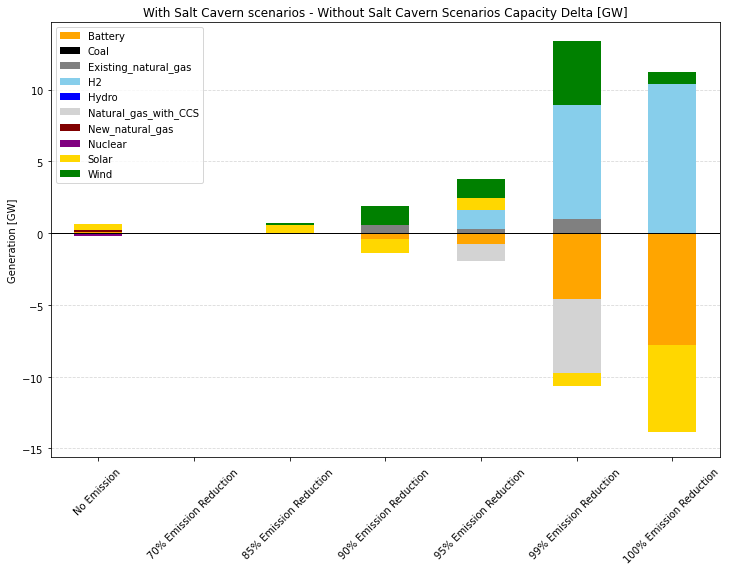

In [147]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Capacity Delta [GW]"
y_label = "Generation [GW]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, generation_capacity_barchart, title=title, y_label=y_label)

# H2 Generation [GWh]

Tech_Type                       ATR_wCCS_94pct  Electrolyzer   Large_SMR  \
PJM_with_MI_no_caverns_0_red          0.006794      0.006163  224.308710   
PJM_with_MI_no_caverns_70_red         0.015666      0.113356  224.211590   
PJM_with_MI_no_caverns_85_red         0.081860     50.241075    5.233724   
PJM_with_MI_no_caverns_90_red         0.088355    191.244758    0.060501   
PJM_with_MI_no_caverns_95_red         0.230755    210.322410    0.098471   
PJM_with_MI_no_caverns_99_red         0.049762    228.729090    0.015583   
PJM_with_MI_no_caverns_100_red        0.000000    566.106022    0.000000   

Tech_Type                       Large_SMR_wCCS_96pct  
PJM_with_MI_no_caverns_0_red                0.015442  
PJM_with_MI_no_caverns_70_red               0.029964  
PJM_with_MI_no_caverns_85_red             205.635025  
PJM_with_MI_no_caverns_90_red             149.524254  
PJM_with_MI_no_caverns_95_red             123.026418  
PJM_with_MI_no_caverns_99_red             133.663603  
PJM_wi

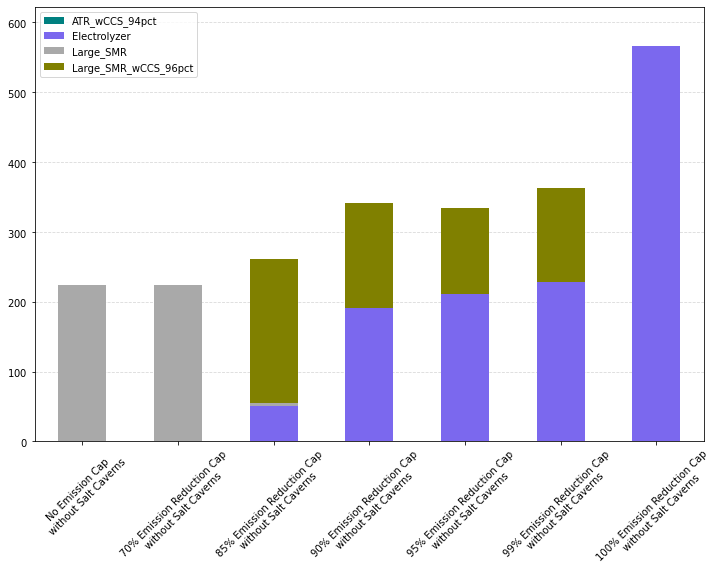

Tech_Type                         ATR_wCCS_94pct  Electrolyzer   Large_SMR  \
PJM_with_MI_with_caverns_0_red          0.026079      0.026150  224.359832   
PJM_with_MI_with_caverns_70_red         0.022267      0.154074  224.183241   
PJM_with_MI_with_caverns_85_red         0.029304     68.610149    2.931895   
PJM_with_MI_with_caverns_90_red         0.009940    204.884175    0.007209   
PJM_with_MI_with_caverns_95_red         0.148551    223.310148    0.033482   
PJM_with_MI_with_caverns_99_red         0.027340    259.439344    0.006543   
PJM_with_MI_with_caverns_100_red        0.000000    819.956130    0.000000   

Tech_Type                         Large_SMR_wCCS_96pct  
PJM_with_MI_with_caverns_0_red                0.068446  
PJM_with_MI_with_caverns_70_red               0.044469  
PJM_with_MI_with_caverns_85_red             199.351040  
PJM_with_MI_with_caverns_90_red             143.513529  
PJM_with_MI_with_caverns_95_red             124.430939  
PJM_with_MI_with_caverns_99_red  

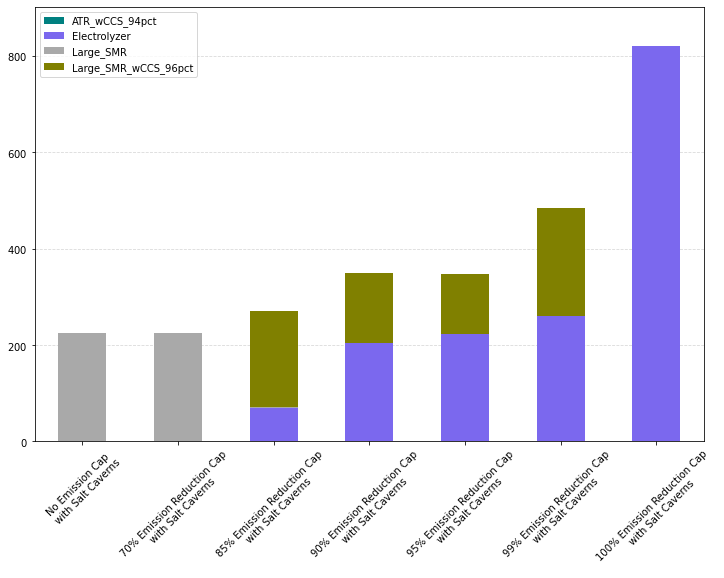

Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')
Tech_Type                                           ATR_wCCS_94pct  \
No Emission Cap\n without Salt Caverns                    0.019285   
70% Emission Reduction Cap\n without Salt Caverns         0.006601   
85% Emission Reduction Cap\n without Salt Caverns        -0.052556   
90% Emission Reduction Cap\n without Salt Caverns        -0.078415   
95% Emission Reduction Cap\n without Salt Caverns        -0.082204   
99% Emission Reduction Cap\n without Salt Caverns        -0.022422   
100% Emission Reduction Cap\n without Salt Caverns        0.000000   

Tech_Type                                           Electrolyzer  Large_SMR  \
No Emission Cap\n without Salt Caverns                  0.019987   0.051122   
70% Emission Reduction Cap\n without Salt Caverns       0.040718  -0.028349   
85% Emission Reduction Cap\n without Salt Caverns      18.369074  -2

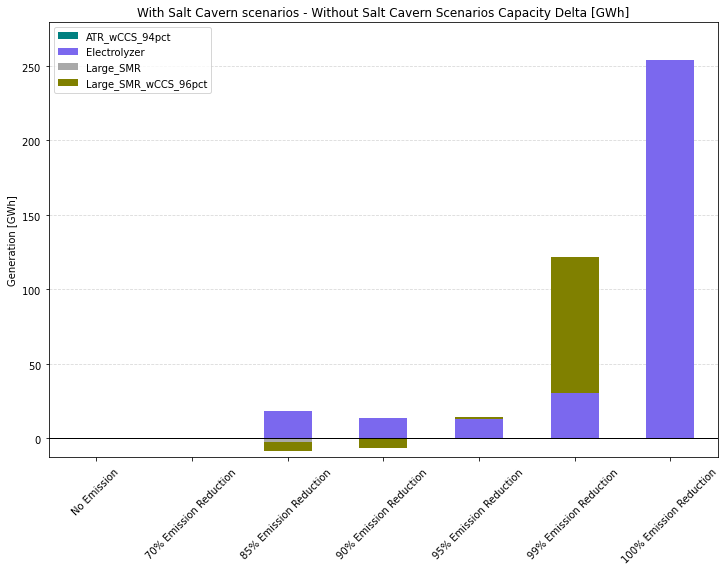

In [30]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Capacity Delta [GWh]"
y_label = "Generation [GWh]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, h2_capacity_generation, units=2, title=title, y_label=y_label)

# Curtailment Analysis

In [31]:
def curtailment_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('curtail.csv', scenario)
    df = df.T
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df[1:]
    df = identify_tech_type(df, generation_resource_categories, aggregate=False)
    df.set_index('Resource', inplace=True)
    df = df[(df['Tech_Type'] == 'Solar') | (df['Tech_Type'] == 'Wind')]

    
    return(df)

In [100]:
def curtailment_barchart(scenarios, title=title, y_label=y_label, units=1):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = curtailment_analysis(scenario)
        
        df_tech = df.groupby(['Tech_Type']).sum()
        df_tech = df_tech.rename(columns={'AnnualSum': scenario})
       
        df_tech = df_tech[scenario]
        
        
        df_main = df_main.append(df_tech, ignore_index=False)

    print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)

                                       Solar          Wind
PJM_with_MI_no_caverns_0_red    1.099447e+06  1.116711e+06
PJM_with_MI_no_caverns_70_red   1.098171e+07  1.915410e+07
PJM_with_MI_no_caverns_85_red   1.724816e+07  4.524487e+07
PJM_with_MI_no_caverns_90_red   2.292988e+07  5.951713e+07
PJM_with_MI_no_caverns_95_red   2.499067e+07  5.942057e+07
PJM_with_MI_no_caverns_99_red   2.872059e+07  3.520018e+07
PJM_with_MI_no_caverns_100_red  6.538802e+07  3.878714e+07
                                       Solar          Wind
PJM_with_MI_no_caverns_0_red    1.099447e+06  1.116711e+06
PJM_with_MI_no_caverns_70_red   1.098171e+07  1.915410e+07
PJM_with_MI_no_caverns_85_red   1.724816e+07  4.524487e+07
PJM_with_MI_no_caverns_90_red   2.292988e+07  5.951713e+07
PJM_with_MI_no_caverns_95_red   2.499067e+07  5.942057e+07
PJM_with_MI_no_caverns_99_red   2.872059e+07  3.520018e+07
PJM_with_MI_no_caverns_100_red  6.538802e+07  3.878714e+07


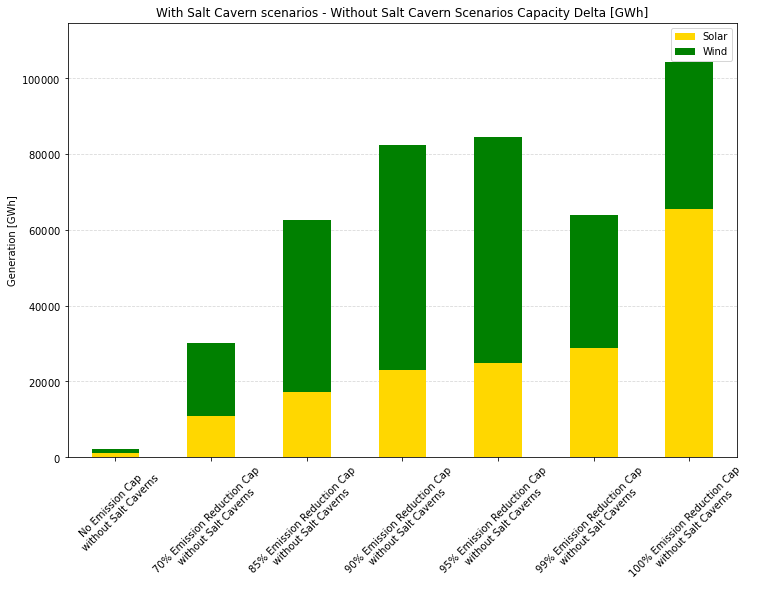

,Solar,Wind
PJM_with_MI_no_caverns_0_red,1.099447e+06,1.116711e+06
PJM_with_MI_no_caverns_70_red,1.098171e+07,1.915410e+07
PJM_with_MI_no_caverns_85_red,1.724816e+07,4.524487e+07
PJM_with_MI_no_caverns_90_red,2.292988e+07,5.951713e+07
PJM_with_MI_no_caverns_95_red,2.499067e+07,5.942057e+07
PJM_with_MI_no_caverns_99_red,2.872059e+07,3.520018e+07
PJM_with_MI_no_caverns_100_red,6.538802e+07,3.878714e+07


In [101]:
curtailment_barchart(scenarios = scenarios)

                                       Solar          Wind
PJM_with_MI_no_caverns_0_red    1.079419e+06  1.127864e+06
PJM_with_MI_no_caverns_70_red   1.098171e+07  1.915410e+07
PJM_with_MI_no_caverns_85_red   1.724816e+07  4.524487e+07
PJM_with_MI_no_caverns_90_red   2.292988e+07  5.951713e+07
PJM_with_MI_no_caverns_95_red   2.499067e+07  5.942057e+07
PJM_with_MI_no_caverns_99_red   2.872059e+07  3.520018e+07
PJM_with_MI_no_caverns_100_red  6.538802e+07  3.878714e+07


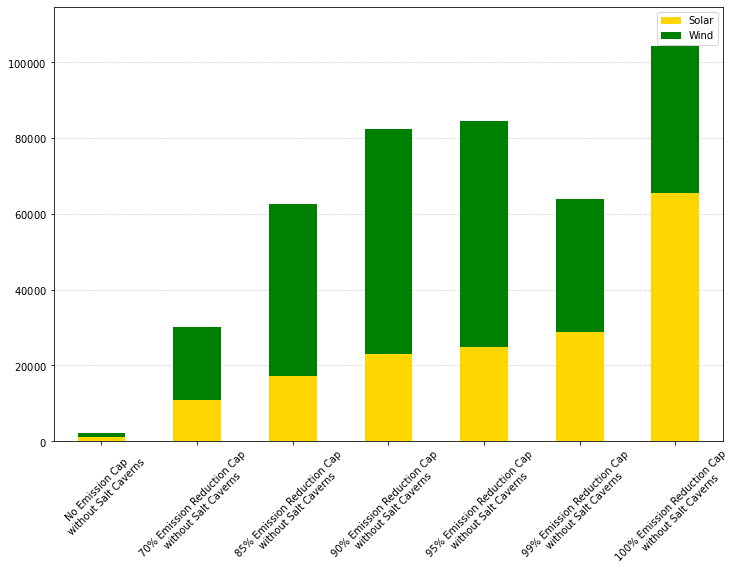

                                         Solar          Wind
PJM_with_MI_with_caverns_0_red    1.083230e+06  1.124312e+06
PJM_with_MI_with_caverns_70_red   1.053170e+07  1.961338e+07
PJM_with_MI_with_caverns_85_red   1.711758e+07  4.428525e+07
PJM_with_MI_with_caverns_90_red   2.195487e+07  6.042066e+07
PJM_with_MI_with_caverns_95_red   2.492360e+07  6.029767e+07
PJM_with_MI_with_caverns_99_red   2.754243e+07  3.870165e+07
PJM_with_MI_with_caverns_100_red  5.326650e+07  3.551578e+07


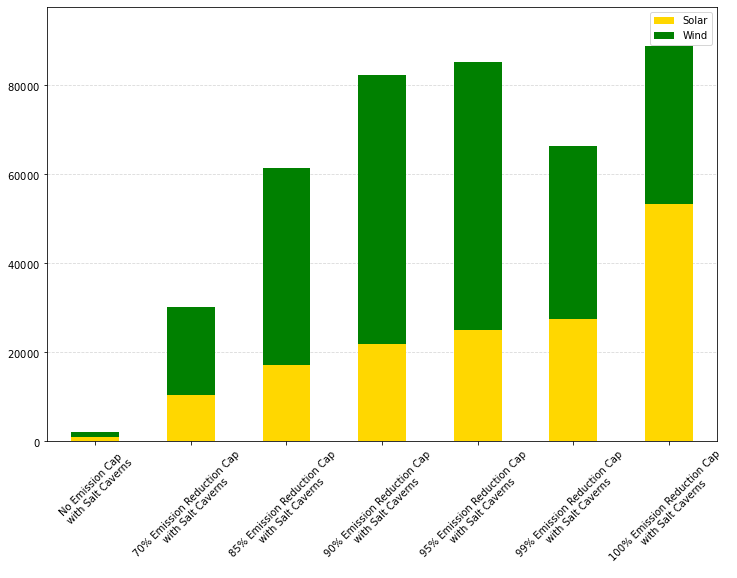

Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')
                                       Solar          Wind
PJM_with_MI_no_caverns_0_red    3.811016e+03 -3.551835e+03
PJM_with_MI_no_caverns_70_red  -4.500149e+05  4.592789e+05
PJM_with_MI_no_caverns_85_red  -1.305809e+05 -9.596186e+05
PJM_with_MI_no_caverns_90_red  -9.750130e+05  9.035295e+05
PJM_with_MI_no_caverns_95_red  -6.707019e+04  8.771032e+05
PJM_with_MI_no_caverns_99_red  -1.178159e+06  3.501468e+06
PJM_with_MI_no_caverns_100_red -1.212152e+07 -3.271356e+06


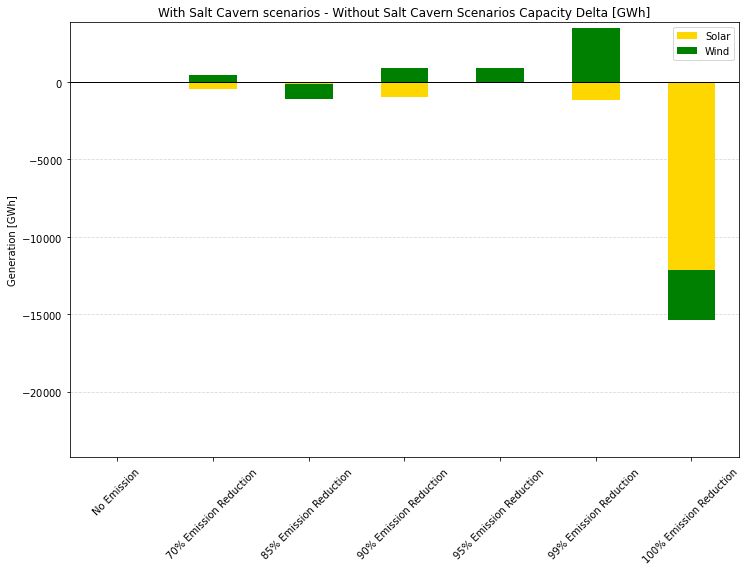

In [34]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Capacity Delta [GWh]"
y_label = "Generation [GWh]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, curtailment_barchart, units=1, title=title, y_label=y_label)

# Cost analysis

In [38]:
scenarios_without_caverns = scenarios_no_caverns
scenarios_with_caverns

df_main = pd.DataFrame()
cavern_info = {} # Here's where we'll store the metadata
base_scenario = [s for s in scenarios_without_caverns if '_0_red' in s and 'no_cavern' in s][0]

Costs                               cTotal      Cavern Info
PJM_with_MI_no_caverns_0_red      1.000000  without Caverns
PJM_with_MI_no_caverns_70_red     1.076372  without Caverns
PJM_with_MI_no_caverns_85_red     1.151565  without Caverns
PJM_with_MI_no_caverns_90_red     1.204533  without Caverns
PJM_with_MI_no_caverns_95_red     1.285421  without Caverns
PJM_with_MI_no_caverns_99_red     1.398748  without Caverns
PJM_with_MI_no_caverns_100_red    1.679405  without Caverns
PJM_with_MI_with_caverns_0_red    1.000085     with Caverns
PJM_with_MI_with_caverns_70_red   1.076376     with Caverns
PJM_with_MI_with_caverns_85_red   1.151346     with Caverns
PJM_with_MI_with_caverns_90_red   1.203111     with Caverns
PJM_with_MI_with_caverns_95_red   1.282996     with Caverns
PJM_with_MI_with_caverns_99_red   1.393180     with Caverns
PJM_with_MI_with_caverns_100_red  1.643228     with Caverns


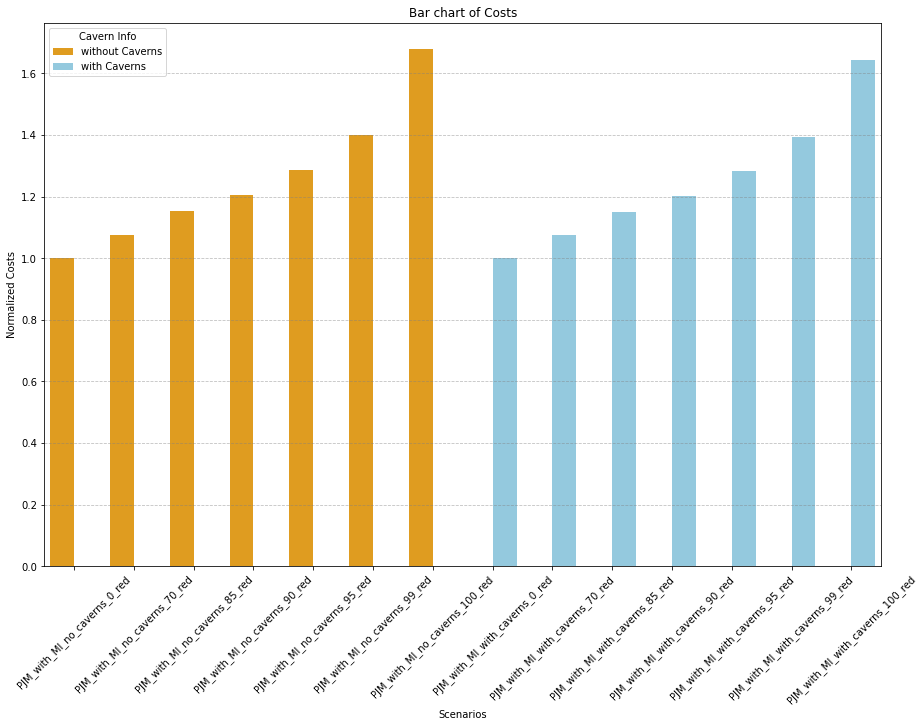

In [39]:
scenarios_without_caverns = scenarios_no_caverns
scenarios_with_caverns

df_main = pd.DataFrame()
cavern_info = {} # Here's where we'll store the metadata

base_scenario = [s for s in scenarios_without_caverns if '_0_red' in s and 'no_cavern' in s][0]
df_base_scenario = open_results_file('costs_system.csv', base_scenario)
df_base_scenario.set_index('Costs', inplace=True)
df_base_scenario = df_base_scenario.loc[['cTotal'], ['Total']]
df_base_scenario = df_base_scenario.rename(columns={'Total': base_scenario})
base_scenario_cost = df_base_scenario.iloc[0][0]

for scenario in scenarios_without_caverns + scenarios_with_caverns:

    df = open_results_file('costs_system.csv', scenario)
    df.set_index('Costs', inplace=True)
    df = df.loc[['cTotal'], ['Total']]
    df = df.rename(columns={'Total': scenario})

    cavern_info[scenario] = 'with Caverns' if scenario in scenarios_with_caverns else 'without Caverns' # Update the metadata

    if df_main.empty:
        df_main = df
    else:
        df_main = df_main.join(df, how='outer')

df_main = df_main.T
df_main = df_main.astype(float) / base_scenario_cost
df_main.sort_values('cTotal')


df_plot = df_main.copy()#.sort_values('cTotal')
df_plot['Cavern Info'] = df_plot.index.map(cavern_info) # Add the metadata back


print(df_plot)


# Create a color palette with two distinct colors
palette ={"with Caverns": "skyblue", "without Caverns": "orange"}

# Plot
plt.figure(figsize=(15,10))
sns.barplot(data=df_plot, x=df_plot.index, y='cTotal', hue='Cavern Info', palette=palette)
plt.grid(True,linestyle='--', which='major', color='gray', alpha=.5, axis='y') 
plt.xlabel('Scenarios')  
plt.ylabel('Normalized Costs')
plt.title('Bar chart of Costs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Cavern Info')
plt.show()

#ax.grid(True, linestyle='--', which='major', color='gray', alpha=.3, axis='y')



Costs                          Scenario    cTotal      Cavern Info  \
0          PJM_with_MI_no_caverns_0_red  1.000000  without Caverns   
1         PJM_with_MI_no_caverns_70_red  1.076372  without Caverns   
2         PJM_with_MI_no_caverns_85_red  1.151565  without Caverns   
3         PJM_with_MI_no_caverns_90_red  1.204533  without Caverns   
4         PJM_with_MI_no_caverns_95_red  1.285421  without Caverns   
5         PJM_with_MI_no_caverns_99_red  1.398748  without Caverns   
6        PJM_with_MI_no_caverns_100_red  1.679405  without Caverns   
7        PJM_with_MI_with_caverns_0_red  1.000085     with Caverns   
8       PJM_with_MI_with_caverns_70_red  1.076376     with Caverns   
9       PJM_with_MI_with_caverns_85_red  1.151346     with Caverns   
10      PJM_with_MI_with_caverns_90_red  1.203111     with Caverns   
11      PJM_with_MI_with_caverns_95_red  1.282996     with Caverns   
12      PJM_with_MI_with_caverns_99_red  1.393180     with Caverns   
13     PJM_with_MI_w

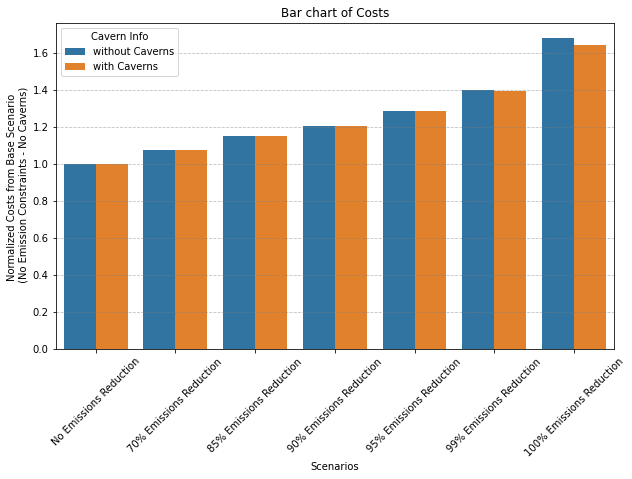

In [40]:
def extract_emission_scenario(s):
    if '_0_red' in s:
        return 'No Emissions Reduction'
    else:
        reduction = s.split('_')[-2]
        return f'{reduction}% Emissions Reduction'

    
scenarios_without_caverns = scenarios_no_caverns
scenarios_with_caverns

df_main = pd.DataFrame()
cavern_info = {} # Here's where we'll store the metadata

base_scenario = [s for s in scenarios_without_caverns if '_0_red' in s and 'no_cavern' in s][0]
df_base_scenario = open_results_file('costs_system.csv', base_scenario)
df_base_scenario.set_index('Costs', inplace=True)
df_base_scenario = df_base_scenario.loc[['cTotal'], ['Total']]
df_base_scenario = df_base_scenario.rename(columns={'Total': base_scenario})
base_scenario_cost = df_base_scenario.iloc[0][0]

for scenario in scenarios_without_caverns + scenarios_with_caverns:

    df = open_results_file('costs_system.csv', scenario)
    df.set_index('Costs', inplace=True)
    df = df.loc[['cTotal'], ['Total']]
    df = df.rename(columns={'Total': scenario})

    cavern_info[scenario] = 'with Caverns' if scenario in scenarios_with_caverns else 'without Caverns' # Update the metadata

    if df_main.empty:
        df_main = df
    else:
        df_main = df_main.join(df, how='outer')

df_main = df_main.T
df_main = df_main.astype(float) / base_scenario_cost
df_main.sort_values('cTotal')


df_plot = df_main.copy()#.sort_values('cTotal')
df_plot['Cavern Info'] = df_plot.index.map(cavern_info) # Add the metadata back    

    
# Reset the index so we can use the 'Scenario' as a column
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'Scenario'}, inplace=True)

# Create the new column 'Emission Scenario' using the function defined above
df_plot['Emission Scenario'] = df_plot['Scenario'].apply(extract_emission_scenario)

print(df_plot)



plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x='Emission Scenario', y='cTotal', hue='Cavern Info')
plt.title('Total Costs for Different Emission Scenarios')
plt.ylabel('Total Costs')
plt.xlabel('Emission Scenarios')
plt.grid(True,linestyle='--', which='major', color='gray', alpha=.5, axis='y') 
plt.xlabel('Scenarios')  
plt.ylabel('Normalized Costs from Base Scenario \n (No Emission Constraints - No Caverns)')
plt.title('Bar chart of Costs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Cavern Info')
plt.show()



                               Difference  Order
70% Emission Reduction Cap\n     0.000004      2
No Emission Cap\n                0.000085      1
90% Emission Reduction Cap\n    -0.001423      4
95% Emission Reduction Cap\n    -0.002425      5
85% Emission Reduction Cap\n    -0.000219      3
100% Emission Reduction Cap\n   -0.036178      7
99% Emission Reduction Cap\n    -0.005567      6


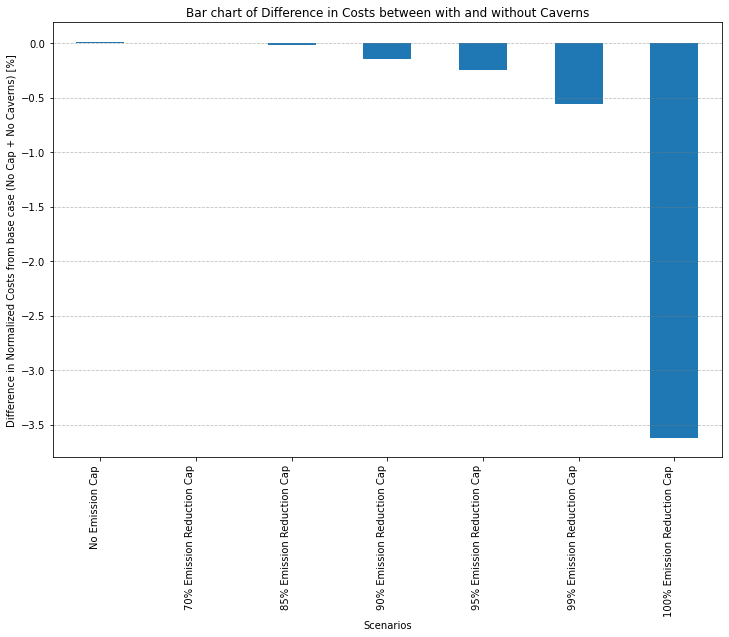

In [41]:
scenarios_without_caverns = scenarios_no_caverns

df_main = pd.DataFrame()
cavern_info = {} # Here's where we'll store the metadata

base_scenario = [s for s in scenarios_without_caverns if '_0_red' in s and 'no_cavern' in s][0]
df_base_scenario = open_results_file('costs_system.csv', base_scenario)
df_base_scenario.set_index('Costs', inplace=True)
df_base_scenario = df_base_scenario.loc[['cTotal'], ['Total']]
df_base_scenario = df_base_scenario.rename(columns={'Total': base_scenario})
base_scenario_cost = df_base_scenario.iloc[0][0]

for scenario in scenarios_without_caverns + scenarios_with_caverns:

    df = open_results_file('costs_system.csv', scenario)
    df.set_index('Costs', inplace=True)
    df = df.loc[['cTotal'], ['Total']]
    df = df.rename(columns={'Total': scenario})

    cavern_info[scenario] = 'with Caverns' if scenario in scenarios_with_caverns else 'without Caverns' # Update the metadata

    if df_main.empty:
        df_main = df
    else:
        df_main = df_main.join(df, how='outer')

df_main = df_main.T
df_main = (df_main.astype(float) - base_scenario_cost) / base_scenario_cost
df_main.sort_values('cTotal')

df_plot = df_main.copy()
df_plot['Cavern Info'] = df_plot.index.map(cavern_info) # Add the metadata back
df_plot.rename(index=rename_dict, inplace=True)

# List to hold the differences
differences = []

# Loop over unique scenario names
for scenario in set(df_plot.index.str.replace(" with Salt Caverns", "").str.replace(" without Salt Caverns", "")):
    # Get the values for the scenario with and without caverns
    with_caverns = df_plot.loc[scenario + " with Salt Caverns", "cTotal"]
    without_caverns = df_plot.loc[scenario + " without Salt Caverns", "cTotal"]
    
    # Calculate the difference and append to the list
    differences.append(with_caverns - without_caverns)

# Create a new DataFrame with the differences
df_differences = pd.DataFrame(differences, index=set(df_plot.index.str.replace(" with Salt Caverns", "").str.replace(" without Salt Caverns", "")), columns=["Difference"])



# Define the order
order_dict = {"No Emission Cap\n": 1,
              "70% Emission Reduction Cap\n": 2,
              "85% Emission Reduction Cap\n": 3,
              "90% Emission Reduction Cap\n": 4,
              "95% Emission Reduction Cap\n": 5,
              "99% Emission Reduction Cap\n": 6,
              "100% Emission Reduction Cap\n": 7}

# Add a new column to the DataFrame with the order
df_differences["Order"] = df_differences.index.map(order_dict)
print(df_differences)
# Sort by the new column
df_differences.sort_values("Order", inplace=True)

# Drop the order column
df_differences.drop("Order", axis=1, inplace=True)

# Plot the differences
# Convert 'Difference' to percentage
df_differences['Difference'] = df_differences['Difference'] * 100


# Create a figure with specified size (width, height)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot
df_differences.plot(kind='bar', legend=False, ax=ax)
plt.grid(True, linestyle='--', which='major', color='gray', alpha=.5, axis='y')
plt.xlabel('Scenarios')  
plt.ylabel('Difference in Normalized Costs from base case (No Cap + No Caverns) [%]')  # indicate percentages in y-label
plt.title('Bar chart of Difference in Costs between with and without Caverns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

#save_and_show_plot(fig, 'your_image_name')




# Salt Cavern Storage over time

,Time,Weight
0,1,4.285714
1,2,4.285714
2,3,4.285714
3,4,4.285714
4,5,4.285714
...,...,...
1843,1844,8.428571
1844,1845,8.428571
1845,1846,8.428571
1846,1847,8.428571


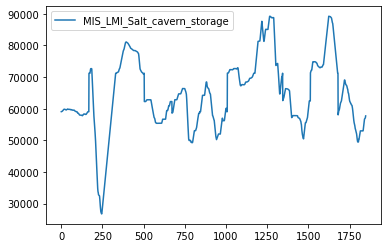

In [42]:
scenario = 'PJM_with_MI_with_caverns_100_red'
df = open_results_file('Results_HSC/HSC_storage.csv', scenario)
time_weight_df = open_results_file('time_weights.csv', scenario)
df = df[1:]
Salt_caverns_df = df.filter(like='Salt_cavern', axis=1)
Salt_caverns_df.plot()
time_weight_df

# Emissions analysis

In [144]:
def emissions_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df_gen = open_results_file('emissions.csv', scenario)
    df_gen = df_gen.T
    df_gen.columns = df_gen.iloc[0]
    df_gen = df_gen.drop(df_gen.index[0])

    df_HSC = open_results_file('Results_HSC/HSC_emissions.csv', scenario)
    df_HSC = df_HSC.T
    df_HSC.columns = df_HSC.iloc[0]
    df_HSC = df_HSC.drop(df_HSC.index[0])

    # Get 'AnnualSum' column from each DataFrame and rename to match system
    power_system = df_gen['AnnualSum'].rename('Power System')
    h2_system = df_HSC['AnnualSum'].rename('H2 System')

    # Concatenate along axis=1 to create new DataFrame
    df = pd.concat([power_system, h2_system], axis=1)

    return(df)

In [145]:
def emissions_barchart(scenarios, title=title, y_label=y_label, units=4):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = emissions_analysis(scenario)
        df = df.T
        df = df['Total']
        df_main = df_main.append(df, ignore_index=False)
        df_main = df_main.rename(index={'Total': scenario})
        #print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)

                                Power System     H2 System
PJM_with_MI_no_caverns_0_red    2.848071e+08  1.640157e+07
PJM_with_MI_no_caverns_70_red   6.900593e+07  1.639407e+07
PJM_with_MI_no_caverns_85_red   4.255738e+07  1.426227e+05
PJM_with_MI_no_caverns_90_red   2.848899e+07  1.101146e+04
PJM_with_MI_no_caverns_95_red   1.419085e+07  9.147739e+03
PJM_with_MI_no_caverns_99_red   2.840917e+06  9.082690e+03
PJM_with_MI_no_caverns_100_red  0.000000e+00  0.000000e+00


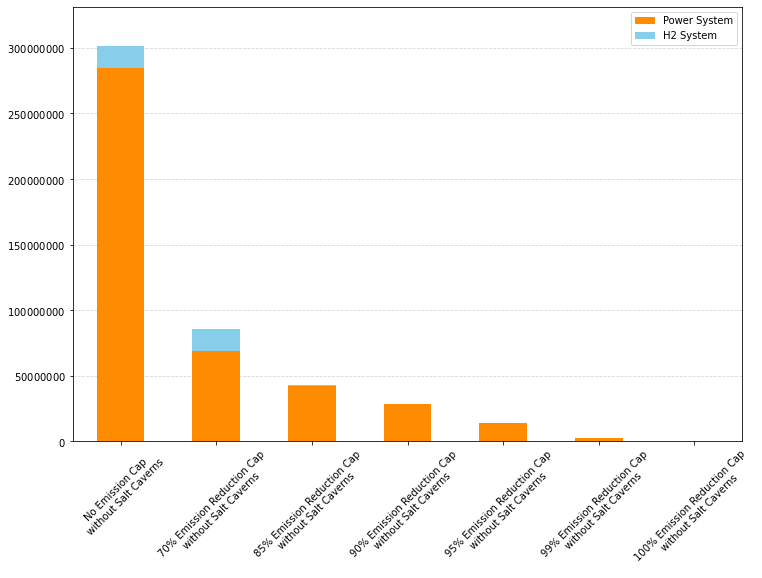

                                  Power System     H2 System
PJM_with_MI_with_caverns_0_red    2.850144e+08  1.639951e+07
PJM_with_MI_with_caverns_70_red   6.900870e+07  1.639130e+07
PJM_with_MI_with_caverns_85_red   4.260646e+07  9.353630e+04
PJM_with_MI_with_caverns_90_red   2.849073e+07  9.267535e+03
PJM_with_MI_with_caverns_95_red   1.419148e+07  8.521044e+03
PJM_with_MI_with_caverns_99_red   2.837049e+06  1.295070e+04
PJM_with_MI_with_caverns_100_red  0.000000e+00  0.000000e+00


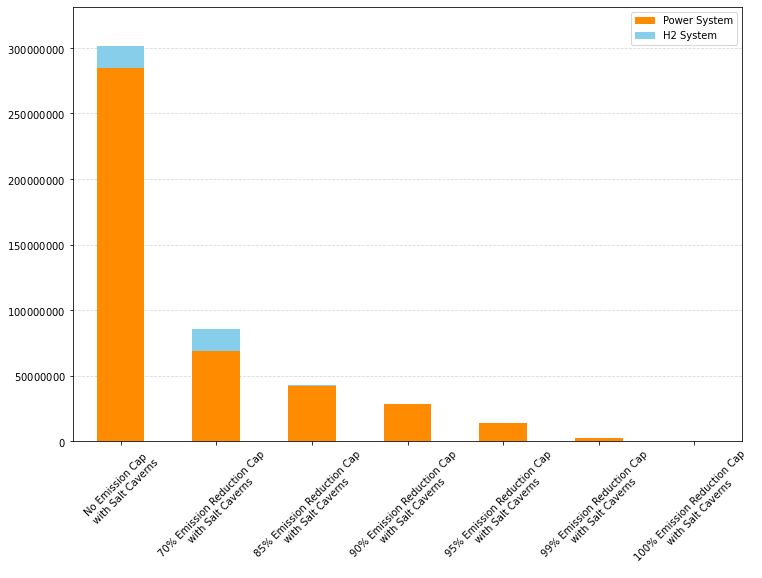

Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')
                                                     Power System  H2 System
No Emission Cap\n without Salt Caverns              207287.806710  -2058.000
70% Emission Reduction Cap\n without Salt Caverns     2766.289195  -2767.000
85% Emission Reduction Cap\n without Salt Caverns    49086.182626 -49086.430
90% Emission Reduction Cap\n without Salt Caverns     1743.929099  -1743.926
95% Emission Reduction Cap\n without Salt Caverns      626.689818   -626.695
99% Emission Reduction Cap\n without Salt Caverns    -3867.977101   3868.011
100% Emission Reduction Cap\n without Salt Caverns       0.000000      0.000


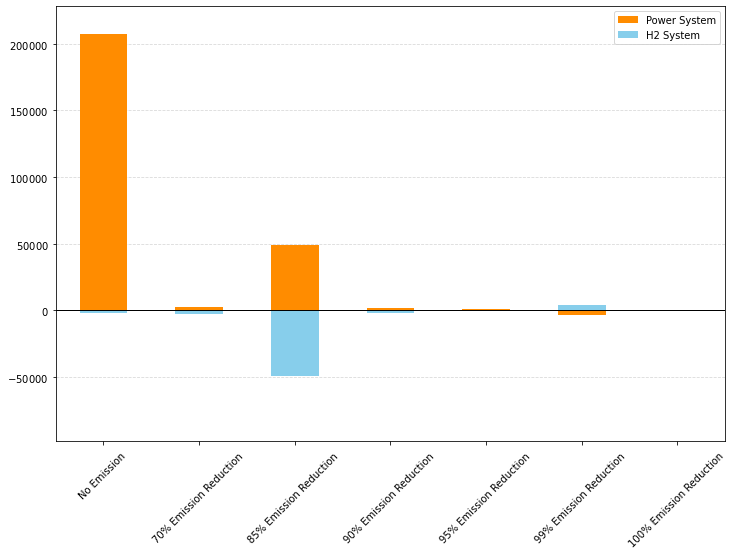

In [146]:
title = ''
y_label = ''

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, emissions_barchart, units=4, title=title, y_label=y_label)

# Spatial Analysis

In [171]:
import geopandas as gpd

#def comparing_zones()

In [ ]:


IPM_numbers_zone_names_dict = {
    
    "MIS_INKY",
    "PJM_WMAC",
    "PJM_SMAC",
    "PJM_West",
    "PJM_AP",
    "PJM_COMD",
    "PJM_ATSI",
    "PJM_Dom",
    "PJM_PENE",
    "S_C_KY",
    "PJM_EMAC",
    "MIS_LMI"
    
}

In [148]:
scenario

'PJM_with_MI_with_caverns_90_red'

In [170]:
resources = H2_resource_categories

df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
df = df.T
#identify_tech_type(df, resources, aggregate=False)
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df = identify_tech_type(df, resources, aggregate=False)
df = df.iloc[:-1]
df = df.groupby(['Zone', 'Tech_Type']).agg('sum') # 'sum' can be replaced by any aggregation function
df = df[['Resource', 'AnnualSum']]
df = df.reset_index()




,Zone,Tech_Type,Resource,AnnualSum
0,1.0,ATR_wCCS_94pct,MIS_INKY_ATR_wCCS_94pct,3.194877
1,1.0,Above_ground_storage,MIS_INKY_Above_ground_storage,60244.754000
2,1.0,Electrolyzer,MIS_INKY_Electrolyzer,517541.060000
3,1.0,Large_SMR,MIS_INKY_Large_SMR,0.924214
4,1.0,Large_SMR_wCCS_96pct,MIS_INKY_Large_SMR_wCCS_96pct,57889.630000
...,...,...,...,...
56,12.0,Above_ground_storage,MIS_LMI_Above_ground_storage,2.275840
57,12.0,Electrolyzer,MIS_LMI_Electrolyzer,24904.303000
58,12.0,Large_SMR,MIS_LMI_Large_SMR,0.704762
59,12.0,Large_SMR_wCCS_96pct,MIS_LMI_Large_SMR_wCCS_96pct,107169.840000


In [ ]:
title = ""
y_label = ""



df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, generation_power_barchart, title=title, y_label=y_label)

In [201]:
df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
df = df.T
#identify_tech_type(df, resources, aggregate=False)
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df

,Resource,Zone,AnnualSum,t1,t2,t3,t4,t5,t6,t7,...,t1839,t1840,t1841,t1842,t1843,t1844,t1845,t1846,t1847,t1848
1,MIS_INKY_Electrolyzer,1.0,517541.06,94.787998,94.787998,94.787998,94.787998,94.787998,94.787997,94.787996,...,94.788005,94.788005,94.788006,94.788005,94.788005,94.788004,94.788004,94.788004,94.788004,94.788004
2,PJM_WMAC_Electrolyzer,2.0,27.329752,0.005149,0.005149,0.005149,0.005149,0.005149,0.005149,0.005149,...,0.00515,0.005149,0.005148,0.005147,0.005147,0.005147,0.005147,0.005147,0.005147,0.005148
3,PJM_SMAC_Electrolyzer,3.0,5.321203,0.000998,0.000998,0.000998,0.000998,0.000998,0.000998,0.000998,...,0.000999,0.000999,0.000998,0.000997,0.000996,0.000997,0.000997,0.000997,0.000997,0.000997
4,PJM_West_Electrolyzer,4.0,145905.27,26.368996,26.368996,26.368996,26.368996,26.368995,26.368995,26.368995,...,26.368998,26.368998,26.368998,26.368996,26.368996,26.368996,26.368996,26.368996,26.368996,26.368996
5,PJM_AP_Electrolyzer,5.0,94078.77,16.55373,16.55373,16.55373,16.55373,16.55373,16.55373,16.553729,...,16.553733,16.553733,16.553732,16.553731,16.553731,16.553731,16.553731,16.553731,16.553731,16.553731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,S_C_KY_Above_ground_storage,10.0,23026.348,4.96484,4.962178,4.954922,4.952803,4.952818,4.969597,4.971029,...,4.782913,4.747791,4.451868,4.233644,4.184814,4.172329,4.167365,4.180333,4.175937,4.168744
59,PJM_EMAC_Above_ground_storage,11.0,114.02593,0.021419,0.021354,0.021285,0.021222,0.021163,0.021103,0.021077,...,0.000412,0.000414,0.000597,0.000398,0.000397,0.000404,0.000408,0.000417,0.000416,0.000695
60,MIS_LMI_Above_ground_storage,12.0,2.27584,0.000485,0.000461,0.000447,0.000437,0.000425,0.00041,0.000477,...,0.000397,0.000366,0.000376,0.000338,0.000315,0.0003,0.000287,0.000275,0.00035,0.000325
61,MIS_LMI_Salt_cavern_storage,12.0,150030.22,24.730027,24.793954,24.796917,24.788066,24.753793,24.801965,25.045733,...,0.00043,0.000425,0.000582,0.000394,0.000394,0.000394,0.000394,0.000398,0.00048,0.000475


In [185]:
gdf = gpd.read_file('ipm_v6_regions')
gdf = gdf[gdf['IPM_Region'].isin(zones)]
# This will print the first few rows of the DataFrame
print(gdf)

   IPM_Region                                           geometry
9    MIS_INKY  MULTIPOLYGON (((2872957.275 757004.201, 287296...
11    MIS_LMI  MULTIPOLYGON (((2969916.943 993245.736, 296992...
29     PJM_AP  MULTIPOLYGON (((3540097.788 831467.204, 354004...
30   PJM_ATSI  MULTIPOLYGON (((3261835.422 1013040.136, 32618...
31   PJM_COMD  POLYGON ((2603204.844 943327.237, 2603304.422 ...
32    PJM_Dom  MULTIPOLYGON (((3883572.601 611525.234, 388355...
33   PJM_EMAC  MULTIPOLYGON (((3763560.527 778866.945, 376359...
34   PJM_PENE  MULTIPOLYGON (((3408962.385 1085516.571, 34089...
35   PJM_SMAC  MULTIPOLYGON (((3676783.701 871210.170, 367683...
36   PJM_West  MULTIPOLYGON (((3709979.209 711723.416, 371014...
37   PJM_WMAC  MULTIPOLYGON (((3539792.953 1054572.808, 35397...
38     S_C_KY  MULTIPOLYGON (((3236679.865 523756.293, 323669...


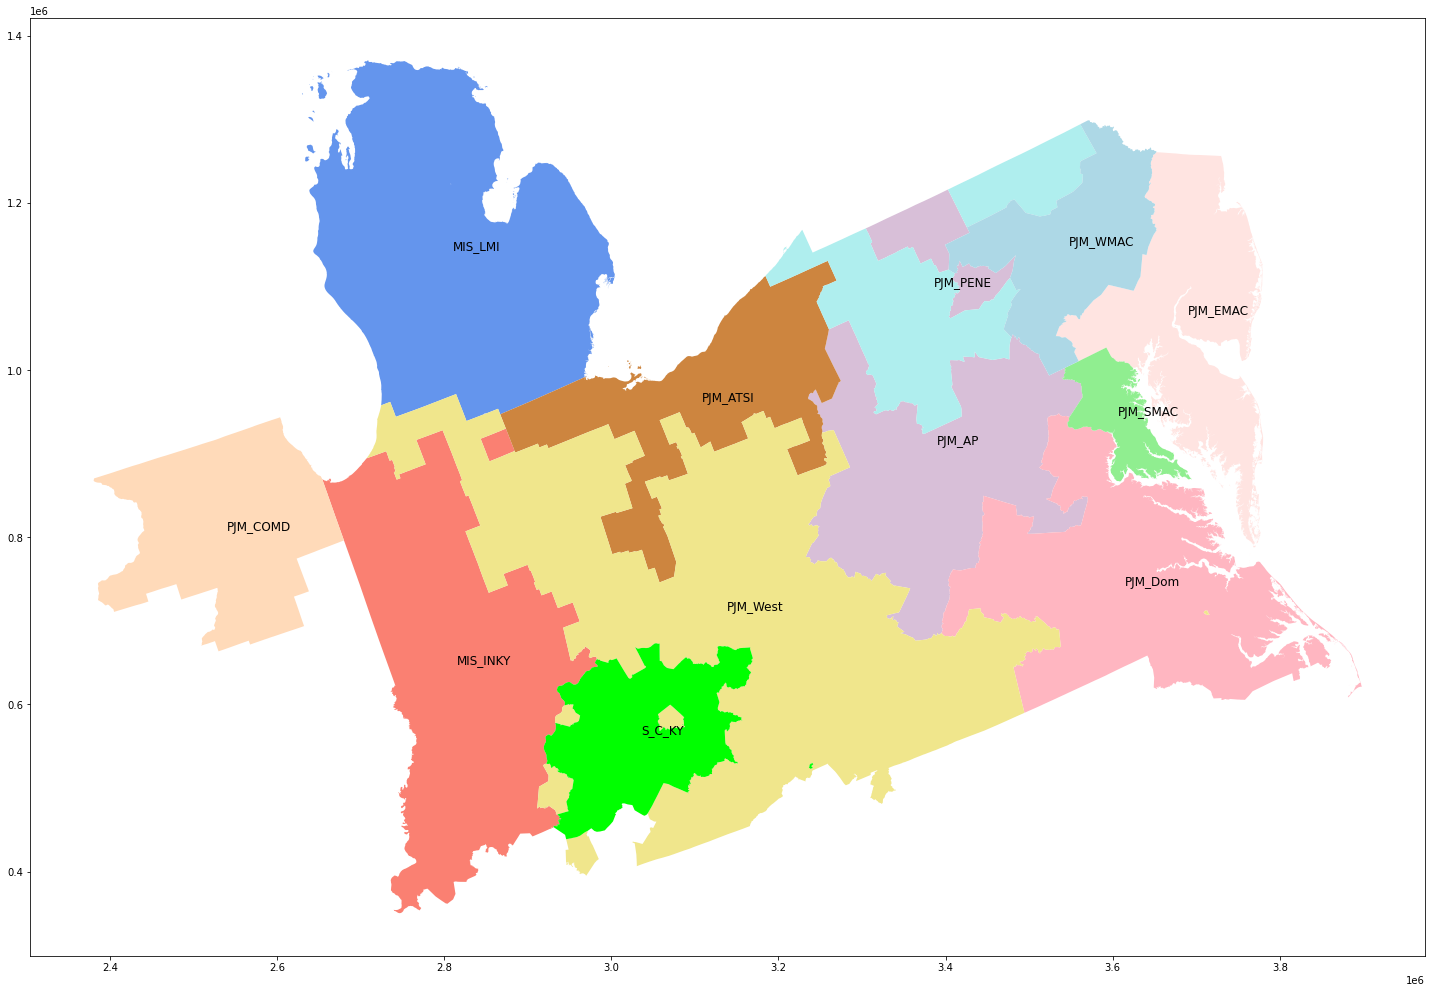

In [193]:
colors_IPM_zones = {
    "MIS_INKY": "salmon",
    "PJM_WMAC": "lightblue",
    "PJM_SMAC": "lightgreen",
    "PJM_West": "khaki",
    "PJM_AP": "thistle",
    "PJM_COMD": "peachpuff",
    "PJM_ATSI": "peru",
    "PJM_Dom": "lightpink",
    "PJM_PENE": "paleturquoise",
    "S_C_KY": "lime",
    "PJM_EMAC": "mistyrose",
    "MIS_LMI": "cornflowerblue"
}


def plot_IPM_zones_filtered(IPM_shapefile_path='ipm_v6_regions', zones=zones, colors=colors_IPM_zones):
    
    gdf = gpd.read_file(IPM_shapefile_path)
    gdf = gdf[gdf['IPM_Region'].isin(zones)]

    # Define color map (you may want to adjust colors according to your preferences)

    # Create a new figure
    fig, ax = plt.subplots(1, 1, figsize=(25, 20)) # Change the size according to your needs

    # Loop over each row in the GeoDataFrame
    for index, row in gdf.iterrows():
        # Plot the zone with the color specified in the color map
        gdf[gdf["IPM_Region"] == row["IPM_Region"]].plot(color=colors_IPM_zones[row["IPM_Region"]], ax=ax)

        # Add a label at the centroid of the zone
        centroid = row["geometry"].centroid
        plt.text(centroid.x, centroid.y, str(row["IPM_Region"]), fontsize=12)

    # Display the plot
    plt.show()
    
plot_IPM_zones_filtered()

In [221]:
df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
df = df.T
#identify_tech_type(df, resources, aggregate=False)
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns={'Zone': 'Zone_N'})
df = identify_tech_type(df, resources, aggregate=False)
df = df.iloc[:-1]
df = df.reset_index()
df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))
df = df[['AnnualSum', 'Tech_Type', 'Zone']]
#df = df.groupby(['Zone', 'Tech_Type']).agg('sum') # 'sum' can be replaced by any aggregation function
df['geo_storage_flag'] = df['Tech_Type'].apply(lambda x: 1 if x == 'Salt_cavern_storage' else 0)
#df['storage_flag'] = df['Tech_Type'].str.contains('storage').astype(int)
df
#for zone in zones:
#    if name.startswith(zone):
            
# WANT TO PLOT ONE STACKED BARCHART PER ZONE   

,AnnualSum,Tech_Type,Zone,geo_storage_flag
0,517541.06,Electrolyzer,MIS_INKY,0
1,27.329752,Electrolyzer,PJM_WMAC,0
2,5.321203,Electrolyzer,PJM_SMAC,0
3,145905.27,Electrolyzer,PJM_West,0
4,94078.77,Electrolyzer,PJM_AP,0
...,...,...,...,...
56,3612.917,Above_ground_storage,PJM_PENE,0
57,23026.348,Above_ground_storage,S_C_KY,0
58,114.02593,Above_ground_storage,PJM_EMAC,0
59,2.27584,Above_ground_storage,MIS_LMI,0


In [ ]:
def identify_tech_type(df, resources, aggregate=True):
    tech_types = []
    for name in df['Resource']:
        for zone in zones:
            if name.startswith(zone):
                cleaned_string = name[len(zone) + 1:]
                break
            else:
                cleaned_string = name
        
        for r in resources:
            if cleaned_string.startswith(r):
                result_string = resources[r]
                break
            else:
                result_string = cleaned_string
        tech_types.append(result_string)

    df['Tech_Type'] = tech_types
    
    if aggregate == True:
        # Aggregate other columns based on the identified technology types
        aggregated_df = df.groupby('Tech_Type').sum().reset_index()

        return aggregated_df
    if aggregate == False:
        return df

    
def identify_zone_name(df, zones=zones):
    
    for name in df['Resource']:
        for zone in zones:
            if name.startswith(zone):

In [195]:
IPM_shapefile_path='ipm_v6_regions'
gdf = gpd.read_file(IPM_shapefile_path)
gdf = gdf[gdf['IPM_Region'].isin(zones)]
gdf

,IPM_Region,geometry
9,MIS_INKY,"MULTIPOLYGON (((2872957.275 757004.201, 287296..."
11,MIS_LMI,"MULTIPOLYGON (((2969916.943 993245.736, 296992..."
29,PJM_AP,"MULTIPOLYGON (((3540097.788 831467.204, 354004..."
30,PJM_ATSI,"MULTIPOLYGON (((3261835.422 1013040.136, 32618..."
31,PJM_COMD,"POLYGON ((2603204.844 943327.237, 2603304.422 ..."
32,PJM_Dom,"MULTIPOLYGON (((3883572.601 611525.234, 388355..."
33,PJM_EMAC,"MULTIPOLYGON (((3763560.527 778866.945, 376359..."
34,PJM_PENE,"MULTIPOLYGON (((3408962.385 1085516.571, 34089..."
35,PJM_SMAC,"MULTIPOLYGON (((3676783.701 871210.170, 367683..."
36,PJM_West,"MULTIPOLYGON (((3709979.209 711723.416, 371014..."


In [243]:
df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
df = df.T
#identify_tech_type(df, resources, aggregate=False)
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df = identify_tech_type(df, resources, aggregate=False)
df = df.iloc[:-1]
df = df.groupby(['Zone', 'Tech_Type']).agg('sum') # 'sum' can be replaced by any aggregation function
df = df[['Resource', 'AnnualSum']]
df = df.reset_index()
df['geo_storage_flag'] = df['Tech_Type'].apply(lambda x: 1 if x == 'Salt_cavern_storage' else 0)
df

,Zone,Tech_Type,Resource,AnnualSum,geo_storage_flag
0,1.0,ATR_wCCS_94pct,MIS_INKY_ATR_wCCS_94pct,3.194877,0
1,1.0,Above_ground_storage,MIS_INKY_Above_ground_storage,60244.754000,0
2,1.0,Electrolyzer,MIS_INKY_Electrolyzer,517541.060000,0
3,1.0,Large_SMR,MIS_INKY_Large_SMR,0.924214,0
4,1.0,Large_SMR_wCCS_96pct,MIS_INKY_Large_SMR_wCCS_96pct,57889.630000,0
...,...,...,...,...,...
56,12.0,Above_ground_storage,MIS_LMI_Above_ground_storage,2.275840,0
57,12.0,Electrolyzer,MIS_LMI_Electrolyzer,24904.303000,0
58,12.0,Large_SMR,MIS_LMI_Large_SMR,0.704762,0
59,12.0,Large_SMR_wCCS_96pct,MIS_LMI_Large_SMR_wCCS_96pct,107169.840000,0


In [242]:
df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
df = df.T
#identify_tech_type(df, resources, aggregate=False)
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df = identify_tech_type(df, resources, aggregate=False)
df = df.iloc[:-1]
df = df.groupby(['Zone', 'Tech_Type']).agg('sum') # 'sum' can be replaced by any aggregation function
df = df[['Resource', 'AnnualSum']]
df = df.reset_index()
df

,Zone,Tech_Type,Resource,AnnualSum
0,1.0,ATR_wCCS_94pct,MIS_INKY_ATR_wCCS_94pct,3.194877
1,1.0,Above_ground_storage,MIS_INKY_Above_ground_storage,60244.754000
2,1.0,Electrolyzer,MIS_INKY_Electrolyzer,517541.060000
3,1.0,Large_SMR,MIS_INKY_Large_SMR,0.924214
4,1.0,Large_SMR_wCCS_96pct,MIS_INKY_Large_SMR_wCCS_96pct,57889.630000
...,...,...,...,...
56,12.0,Above_ground_storage,MIS_LMI_Above_ground_storage,2.275840
57,12.0,Electrolyzer,MIS_LMI_Electrolyzer,24904.303000
58,12.0,Large_SMR,MIS_LMI_Large_SMR,0.704762
59,12.0,Large_SMR_wCCS_96pct,MIS_LMI_Large_SMR_wCCS_96pct,107169.840000


In [ ]:
# Seperating by zones
# Want to isolate zones that have geostorage
# 

In [ ]:
## set week
week = 8
# sort resources by resource category for generators (from power.csv) and storage (from storage.csv)
#resource_abr = ['hydroelectric','bio or geothermal','nuclear(?!.*mid)','nuclear_mid','natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'battery','solar|pv','wind']
#resource_name = ['Hydro','Geothermal and Biomass','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Coal', 'Battery','Solar','Wind']
#color = ['darkblue','darkorange','gray','lightgray','darkred','lightcoral','red', 'teal', 'sienna','gold','green']
resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'coal', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'wind', 'solar|pv', 'battery']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Coal', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Wind', 'Solar', 'Battery']
color = ['darkblue','gray','lightgray','teal', 'darkred','lightcoral','red', 'green', 'gold', 'sienna']
#gen = power.iloc[2:,:]/1000
gendf = pd.DataFrame()
storagedf = pd.DataFrame()
for i in range(len(resource_abr)):
    gendf[resource_name[i]] = gen.loc[:, gen.columns.str.contains(resource_abr[i])].sum(axis=1)
    storagedf[resource_name[i]] = storage.loc[:, storage.columns.str.contains(resource_abr[i])].sum(axis=1)/1000
# plot dispatch profile
f, ax = plt.subplots(figsize=(12,8))
weekgen = gendf.iloc[(week-1)*168:week*168].reset_index(drop=True)
plt.stackplot(weekgen.index,weekgen['Hydro'],weekgen['Existing Nuclear'],weekgen['New Nuclear'], weekgen['Existing Coal'], weekgen['Existing Natural Gas'], weekgen['New Natural Gas'],weekgen['Natural Gas CCS'], weekgen['Wind'], weekgen['Solar'], weekgen['Battery'], colors = color)
#plt.stackplot(weekgen.index,weekgen['Hydro'],weekgen['Existing Nuclear'],weekgen['New Nuclear'],weekgen['Existing Natural Gas'],weekgen['New Natural Gas'],weekgen['Natural Gas CCS'], weekgen['Existing Coal'], weekgen['Solar'],weekgen['Wind'], colors = color)
for i in range(len(resource_name)):
    plt.plot([], [], color = color[i],label =resource_name[i])
# plot demand (from TDR load data) and demand + charge (from charge.csv)
#demand = power_balance.loc[2:,power_balance.columns.str.contains('Demand')].reset_index(drop=True)/1000
demand = -demand.loc[:, demand.any()].sum(axis=1).iloc[(week-1)*168:week*168].reset_index(drop = True)
#charge = #-power_balance.loc[2:,power_balance.columns.str.contains('Storage_Discharge')].sum(axis=1)/1000
plt.plot(demand.index,demand, color = 'black', label = 'Load')
plt.plot(demand.index,demand + charge.iloc[(week-1)*168:week*168].reset_index(drop=True), color = 'black', label = 'Load + charge', linestyle = '--')
# plot storage
#battery = (power_balance.loc[2:,power_balance.columns.str.contains('Storage_Discharge')].sum(axis=1)/1000).iloc[(week-1)*168:week*168].reset_index(drop=True)
#plt.stackplot(demand.index,battery, colors = 'goldenrod')
#battery_ch = (power_balance.loc[2:,power_balance.columns.str.contains('Storage_Charge')].sum(axis=1)/1000).iloc[(week-1)*168:week*168].reset_index(drop=True)
#plt.stackplot(demand.index,battery_ch, colors = 'red')
# figure settings
#plt.title('Reference Dispatch Profile (Week '+ str(week)+')')
plt.xlabel('Time (hr)')
plt.ylabel('Power (GW)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0)
plt.xlim(0,168)
#plt.ylim(0,190)
plt.show()